### Import the necessary libraries:

In [164]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
import warnings 
warnings.filterwarnings( "ignore")

# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

### Load the data:

In [165]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("Election_Data.csv")

In [166]:
# Check top few records to get a feel of the data structure
df.head(10)

Unnamed: 0    vote  age  economic.cond.national  economic.cond.household  \
0           1  Labour   43                       3                        3   
1           2  Labour   36                       4                        4   
2           3  Labour   35                       4                        4   
3           4  Labour   24                       4                        2   
4           5  Labour   41                       2                        2   
5           6  Labour   47                       3                        4   
6           7  Labour   57                       2                        2   
7           8  Labour   77                       3                        4   
8           9  Labour   39                       3                        3   
9          10  Labour   70                       3                        2   

   Blair  Hague  Europe  political.knowledge  gender  
0      4      1       2                    2  female  
1      4      4       5                    2    male  
2      5      2       3                    2    male  
3      2      1       4                    0  female  
4      1      1       6                    2    male  
5      4      4       4                    2    male  
6      4      4      11                    2    male  
7      4      1       1                    0    male  
8      4      4      11                    0  female  
9      5      1      11                    2    male

### We will drop the first column ‘Unnamed: 0’ column as this is not important for our study

In [167]:
# drop the serial no column as it is useless for the model
df = df.drop('Unnamed: 0', axis=1)

### Checking the data:

In [168]:
# Check top few records to get a feel of the data structure
df.head(10)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   
5  Labour   47                       3                        4      4      4   
6  Labour   57                       2                        2      4      4   
7  Labour   77                       3                        4      4      1   
8  Labour   39                       3                        3      4      4   
9  Labour   70                       3                        2      5      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male  
5       4                    2    male  
6      11                    2    male  
7       1                    0    male  
8      11                    0  female  
9      11                    2    male

In [169]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

### Checking the shape of the data :

In [170]:
# Checking the shape of the dataset.
print("Number of rows: ",df.shape[0], "\n""Number of columns: ",df.shape[1])

Number of rows:  1525 
Number of columns:  9


### Retreive the list of fields along with their data type:

In [171]:
#Getting the info data types column wise
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


Observation-1:

- The data set contains 1525 rows, 10 columns.
- In the given data set there are 2 Object type features: vote and gender , 7 integer type features, Where 'VOTE' is the target variable and all other are predector variable.
- The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

### Checking the Summary Statistic

In [172]:
df.describe().T

count       mean        std   min   25%   50%   75%  \
age                      1525.0  54.182295  15.711209  24.0  41.0  53.0  67.0   
economic.cond.national   1525.0   3.245902   0.880969   1.0   3.0   3.0   4.0   
economic.cond.household  1525.0   3.140328   0.929951   1.0   3.0   3.0   4.0   
Blair                    1525.0   3.334426   1.174824   1.0   2.0   4.0   4.0   
Hague                    1525.0   2.746885   1.230703   1.0   2.0   2.0   4.0   
Europe                   1525.0   6.728525   3.297538   1.0   4.0   6.0  10.0   
political.knowledge      1525.0   1.542295   1.083315   0.0   0.0   2.0   2.0   

                          max  
age                      93.0  
economic.cond.national    5.0  
economic.cond.household   5.0  
Blair                     5.0  
Hague                     5.0  
Europe                   11.0  
political.knowledge       3.0

In [173]:
df.describe(include='all').T

count unique     top  freq       mean        std  \
vote                       1525      2  Labour  1063        NaN        NaN   
age                      1525.0    NaN     NaN   NaN  54.182295  15.711209   
economic.cond.national   1525.0    NaN     NaN   NaN   3.245902   0.880969   
economic.cond.household  1525.0    NaN     NaN   NaN   3.140328   0.929951   
Blair                    1525.0    NaN     NaN   NaN   3.334426   1.174824   
Hague                    1525.0    NaN     NaN   NaN   2.746885   1.230703   
Europe                   1525.0    NaN     NaN   NaN   6.728525   3.297538   
political.knowledge      1525.0    NaN     NaN   NaN   1.542295   1.083315   
gender                     1525      2  female   812        NaN        NaN   

                          min   25%   50%   75%   max  
vote                      NaN   NaN   NaN   NaN   NaN  
age                      24.0  41.0  53.0  67.0  93.0  
economic.cond.national    1.0   3.0   3.0   4.0   5.0  
economic.cond.household   1.0   3.0   3.0   4.0   5.0  
Blair                     1.0   2.0   4.0   4.0   5.0  
Hague                     1.0   2.0   2.0   4.0   5.0  
Europe                    1.0   4.0   6.0  10.0  11.0  
political.knowledge       0.0   0.0   2.0   2.0   3.0  
gender                    NaN   NaN   NaN   NaN   NaN

### Checking for Missing Values

In [174]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

Observations:
    
- There is no missing values.

### Checking for duplicate values:

In [175]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 8


Observation:

- There are 8 duplicate values.

In [176]:
df.drop_duplicates(inplace=True)

In [177]:
df.head(10)

vote  age  economic.cond.national  economic.cond.household  Blair  Hague  \
0  Labour   43                       3                        3      4      1   
1  Labour   36                       4                        4      4      4   
2  Labour   35                       4                        4      5      2   
3  Labour   24                       4                        2      2      1   
4  Labour   41                       2                        2      1      1   
5  Labour   47                       3                        4      4      4   
6  Labour   57                       2                        2      4      4   
7  Labour   77                       3                        4      4      1   
8  Labour   39                       3                        3      4      4   
9  Labour   70                       3                        2      5      1   

   Europe  political.knowledge  gender  
0       2                    2  female  
1       5                    2    male  
2       3                    2    male  
3       4                    0  female  
4       6                    2    male  
5       4                    2    male  
6      11                    2    male  
7       1                    0    male  
8      11                    0  female  
9      11                    2    male

In [178]:
df.shape

(1517, 9)

In [179]:
df.describe(include='all').T

count unique     top  freq       mean        std  \
vote                       1517      2  Labour  1057        NaN        NaN   
age                      1517.0    NaN     NaN   NaN  54.241266  15.701741   
economic.cond.national   1517.0    NaN     NaN   NaN   3.245221   0.881792   
economic.cond.household  1517.0    NaN     NaN   NaN   3.137772   0.931069   
Blair                    1517.0    NaN     NaN   NaN   3.335531   1.174772   
Hague                    1517.0    NaN     NaN   NaN   2.749506   1.232479   
Europe                   1517.0    NaN     NaN   NaN   6.740277   3.299043   
political.knowledge      1517.0    NaN     NaN   NaN   1.540541   1.084417   
gender                     1517      2  female   808        NaN        NaN   

                          min   25%   50%   75%   max  
vote                      NaN   NaN   NaN   NaN   NaN  
age                      24.0  41.0  53.0  67.0  93.0  
economic.cond.national    1.0   3.0   3.0   4.0   5.0  
economic.cond.household   1.0   3.0   3.0   4.0   5.0  
Blair                     1.0   2.0   4.0   4.0   5.0  
Hague                     1.0   2.0   2.0   4.0   5.0  
Europe                    1.0   4.0   6.0  10.0  11.0  
political.knowledge       0.0   0.0   2.0   2.0   3.0  
gender                    NaN   NaN   NaN   NaN   NaN

In [180]:
# Getting the summary statistics of the  object variable.
df.describe(include=['object'])

vote  gender
count     1517    1517
unique       2       2
top     Labour  female
freq      1057     808

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [182]:
#Changing the name of the few variables who are having dot and replacing it with underscore.
#df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"}

# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

In [183]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


### Univariate Analysis

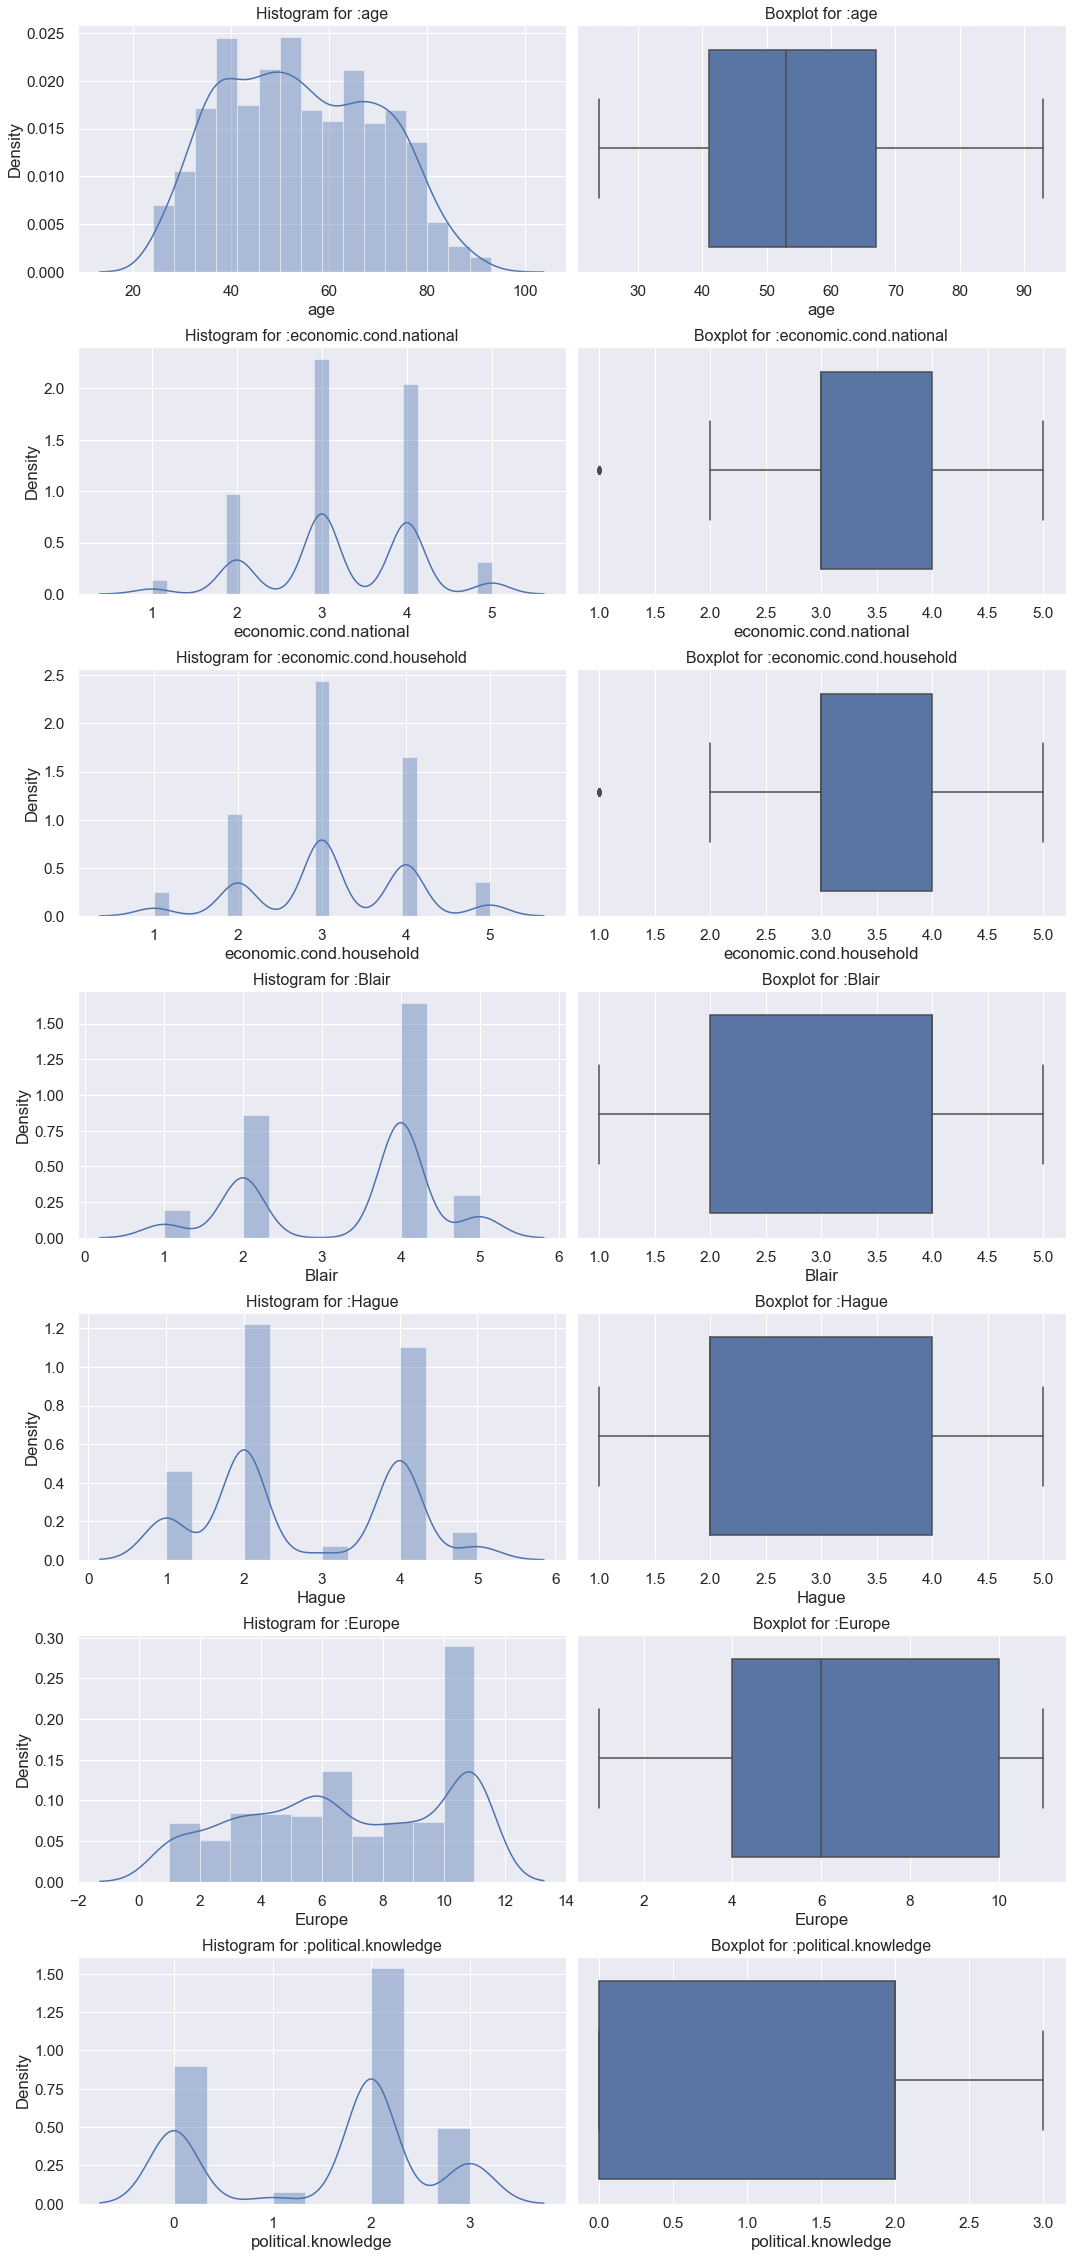

In [184]:
a=1
plt.figure(figsize=(15,80))
for i in df.columns :
    if df[i].dtypes != 'object':
        plt.subplot(18,2,a)
        sns.distplot(df[i])
        plt.title("Histogram for :" +i,fontsize = 16)
        plt.subplot(18,2,a+1)
        sns.boxplot(df[i])
        plt.title("Boxplot for :" +i,fontsize = 16)
        a+=2
plt.tight_layout()

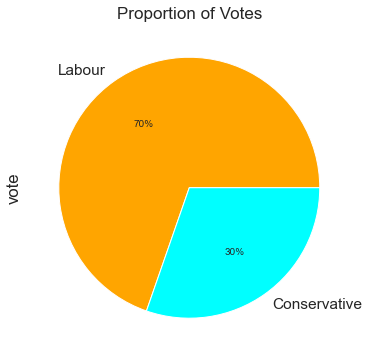

In [185]:
plt.figure(figsize=(6,6))
colors = ['orange','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes',fontsize=17);

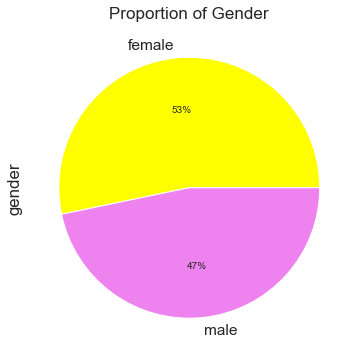

In [186]:
plt.figure(figsize=(6,6))
colors = ['yellow','violet']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender',fontsize=17);

<Figure size 864x576 with 0 Axes>

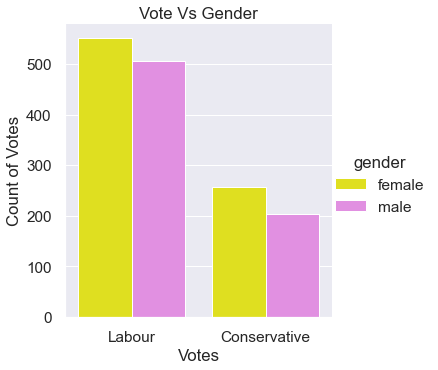

In [187]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes');

In [188]:
df[df.vote == "Labour"].age.mean()

53.10974456007568

In [189]:
df[df.vote == "Conservative"].age.mean()

56.84130434782609

In [190]:
df['economic.cond.national'].value_counts(normalize=True)

3    0.398154
4    0.354647
2    0.168754
5    0.054054
1    0.024390
Name: economic.cond.national, dtype: float64

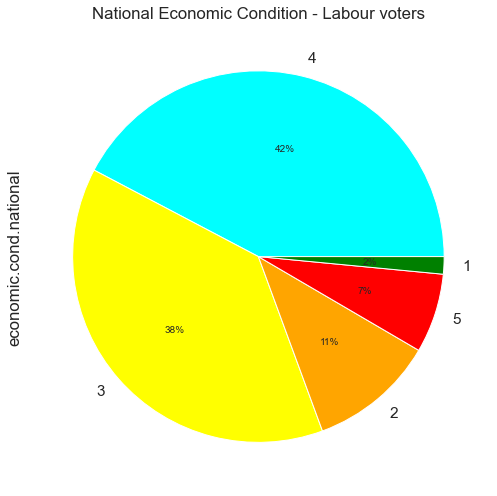

In [191]:
plt.figure(figsize=(8,7))
colors = ['cyan','yellow','orange','red','green']
df[df.vote == "Labour"]['economic.cond.national'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
plt.tight_layout()

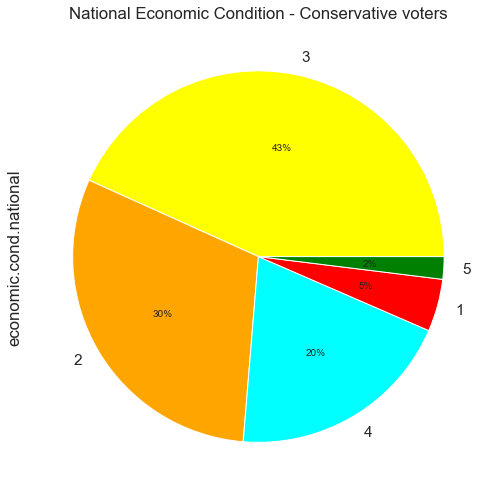

In [192]:
plt.figure(figsize=(8,7))
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"]['economic.cond.national'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.tight_layout();

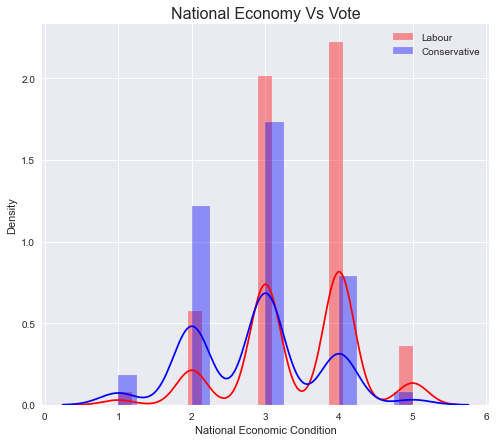

In [193]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour']['economic.cond.national'], label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative']['economic.cond.national'], label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=16)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

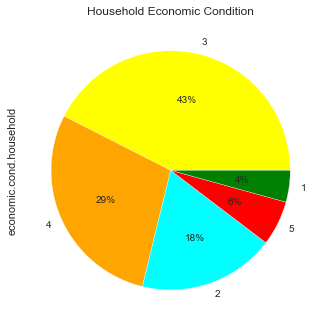

In [194]:
df['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

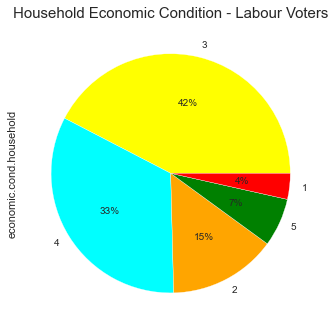

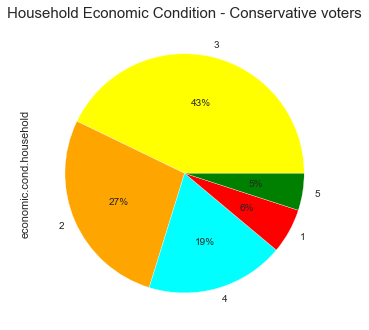

In [195]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"]['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters',fontsize=15)
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"]['economic.cond.household'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters',fontsize=15)
plt.show()

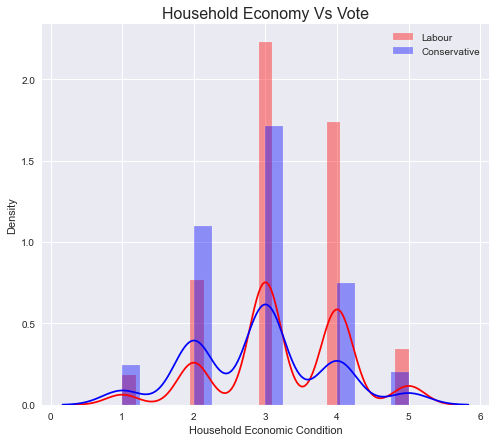

In [196]:
import matplotlib.style
plt.style.use('seaborn')
f, ax = plt.subplots(figsize = (8,7))
sns.distplot(df[df.vote=='Labour']['economic.cond.household'], label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative']['economic.cond.household'], label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=16)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

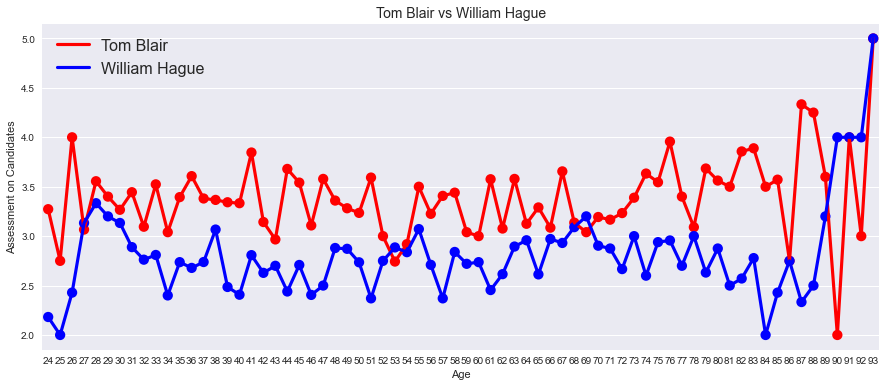

In [197]:
f, ax = plt.subplots(figsize = (15,6))
ax = sns.pointplot(x='age', y="Blair", data=df, ci = None, color = 'red', label = 'Blair')
ax=sns.pointplot(x="age", y="Hague", data=df, ci = None, color = 'blue', label = 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment on Candidates')
plt.title("Tom Blair vs William Hague",fontsize=(14))
label=('Tom Blair','William Hague')
ax.legend(label,fontsize=16)
plt.show()

### Let us define a function 'univariateAnalysis_category' to display information as part of univariate analysis of categorical variables.
The function should display the frequency of all the levels within the field and display a frequency plot

### Getting unique counts of Categorical Variables

In [198]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [199]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['vote', 'gender']

Details of vote
----------------------------------------------------------------
Labour          1057
Conservative     460
Name: vote, dtype: int64


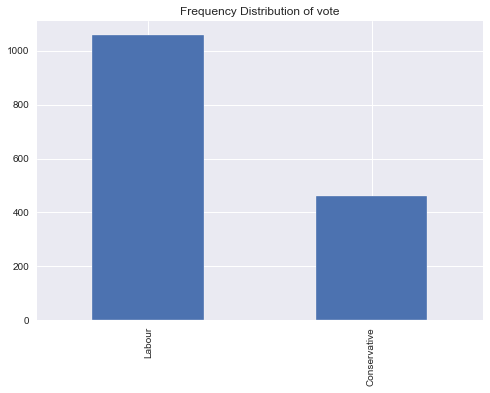

       
Details of gender
----------------------------------------------------------------
female    808
male      709
Name: gender, dtype: int64


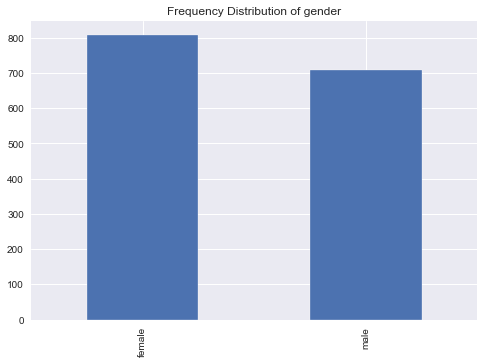

In [200]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

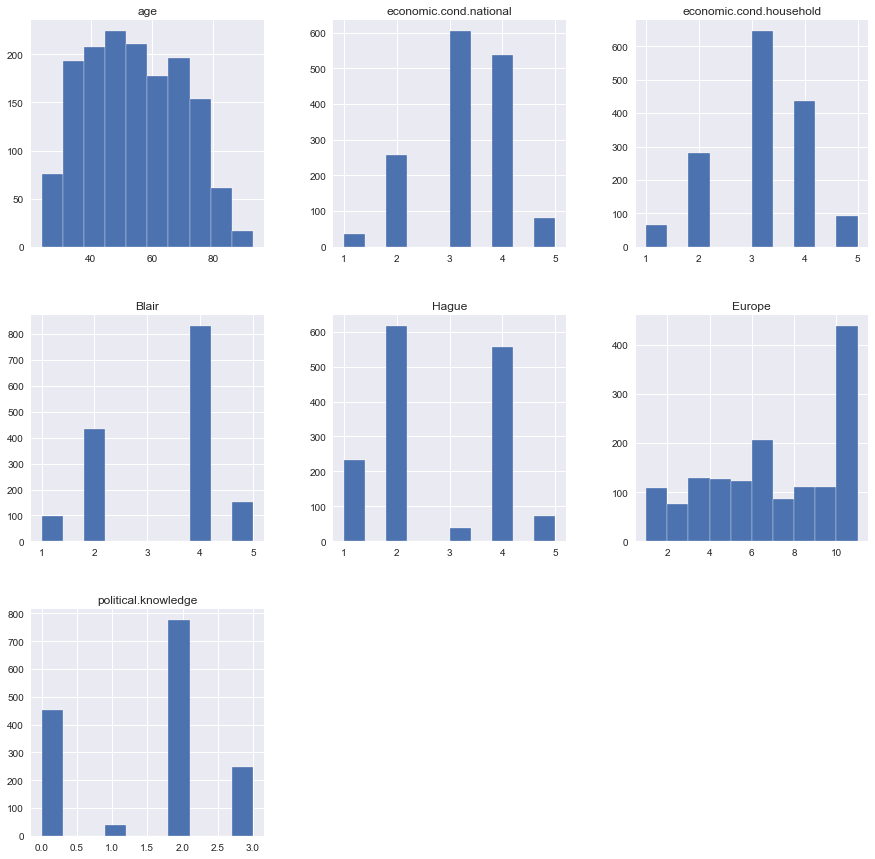

In [201]:
df.hist(figsize=(15,15));

### Bivariate Analysis And Multivariate Analysis:

### Correlation between variables of the dataset

In [202]:
corr = df.corr()
round(corr,3)

age  economic.cond.national  \
age                      1.000                   0.019   
economic.cond.national   0.019                   1.000   
economic.cond.household -0.039                   0.348   
Blair                    0.032                   0.326   
Hague                    0.031                  -0.201   
Europe                   0.065                  -0.209   
political.knowledge     -0.047                  -0.024   

                         economic.cond.household  Blair  Hague  Europe  \
age                                       -0.039  0.032  0.031   0.065   
economic.cond.national                     0.348  0.326 -0.201  -0.209   
economic.cond.household                    1.000  0.216 -0.100  -0.113   
Blair                                      0.216  1.000 -0.244  -0.296   
Hague                                     -0.100 -0.244  1.000   0.286   
Europe                                    -0.113 -0.296  0.286   1.000   
political.knowledge                       -0.039 -0.021 -0.030  -0.151   

                         political.knowledge  
age                                   -0.047  
economic.cond.national                -0.024  
economic.cond.household               -0.039  
Blair                                 -0.021  
Hague                                 -0.030  
Europe                                -0.151  
political.knowledge                    1.000

### CORRELATION HEATMAP :

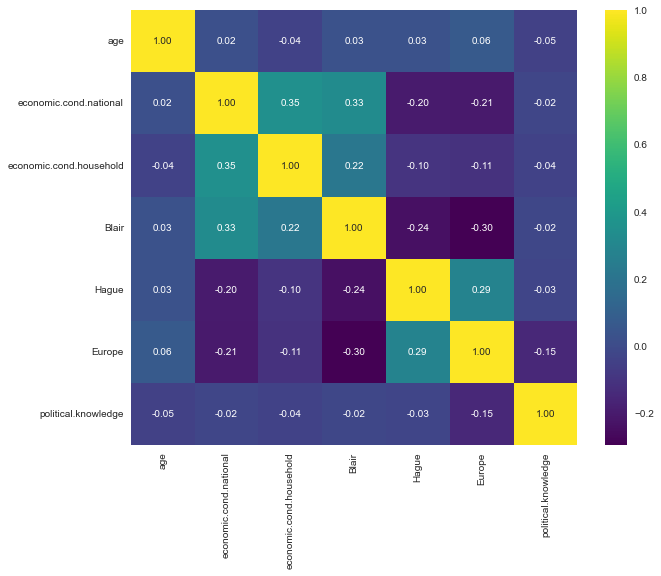

In [203]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

### How each feature affects the voting preference

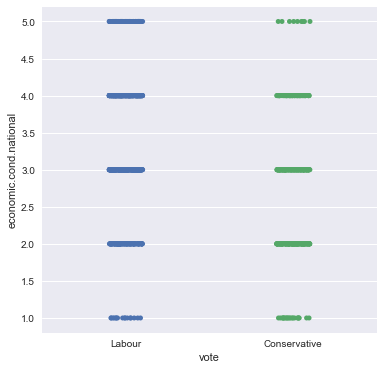

In [204]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

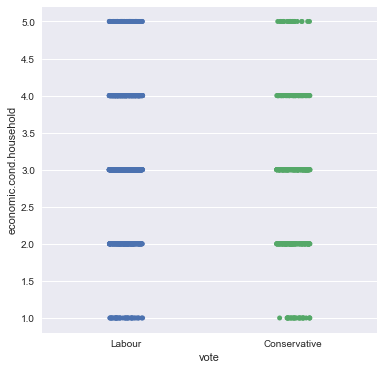

In [205]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

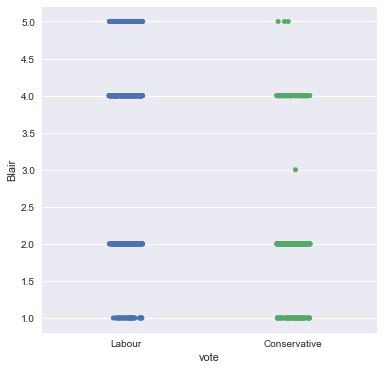

In [206]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

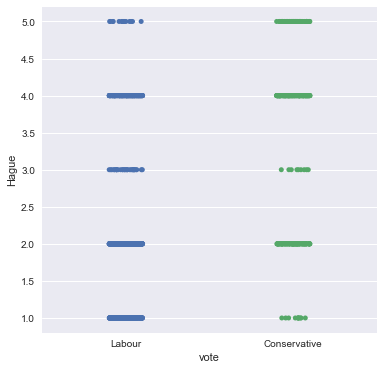

In [207]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

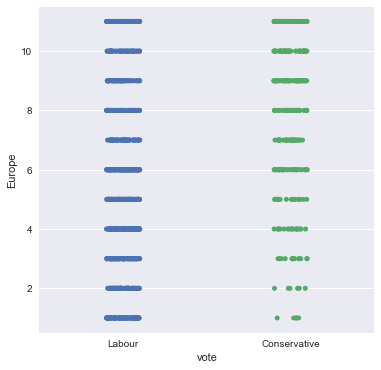

In [208]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

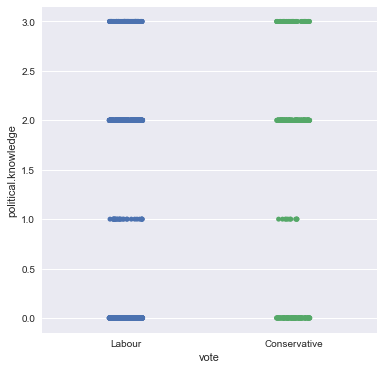

In [209]:
plt.figure(figsize=(6,6))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

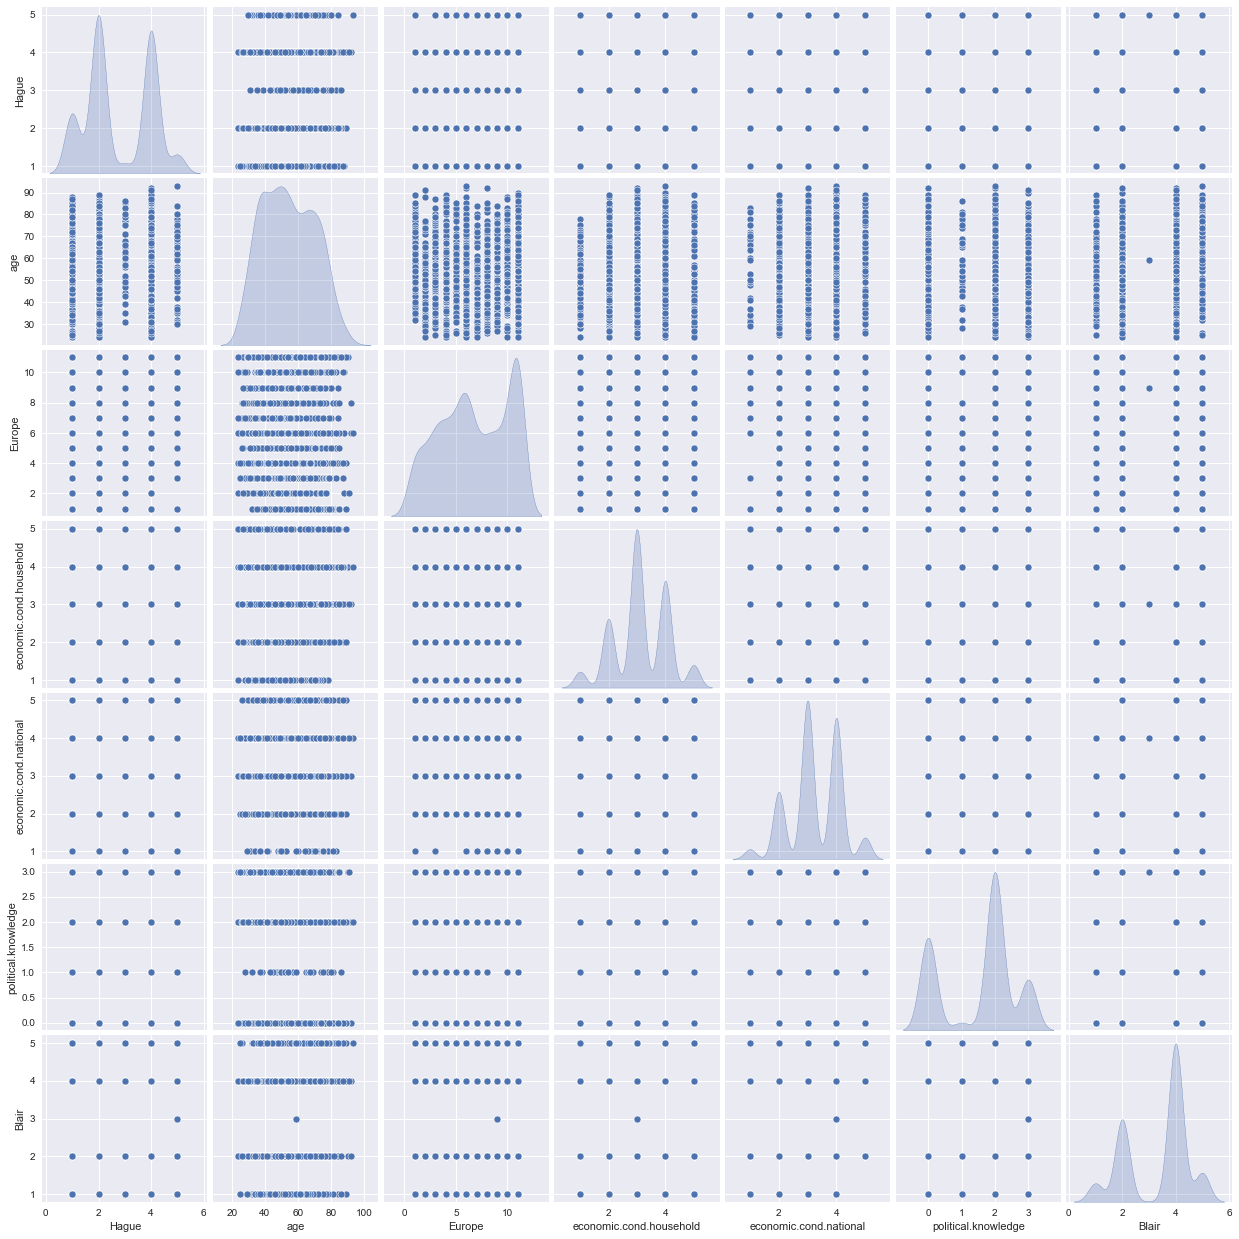

In [210]:
import seaborn as sns
cols = ['Hague','age', 'Europe', 'economic.cond.household', 'economic.cond.national', 'political.knowledge',
       'Blair' ]

df_attr = (df[cols])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

<Figure size 576x396 with 0 Axes>

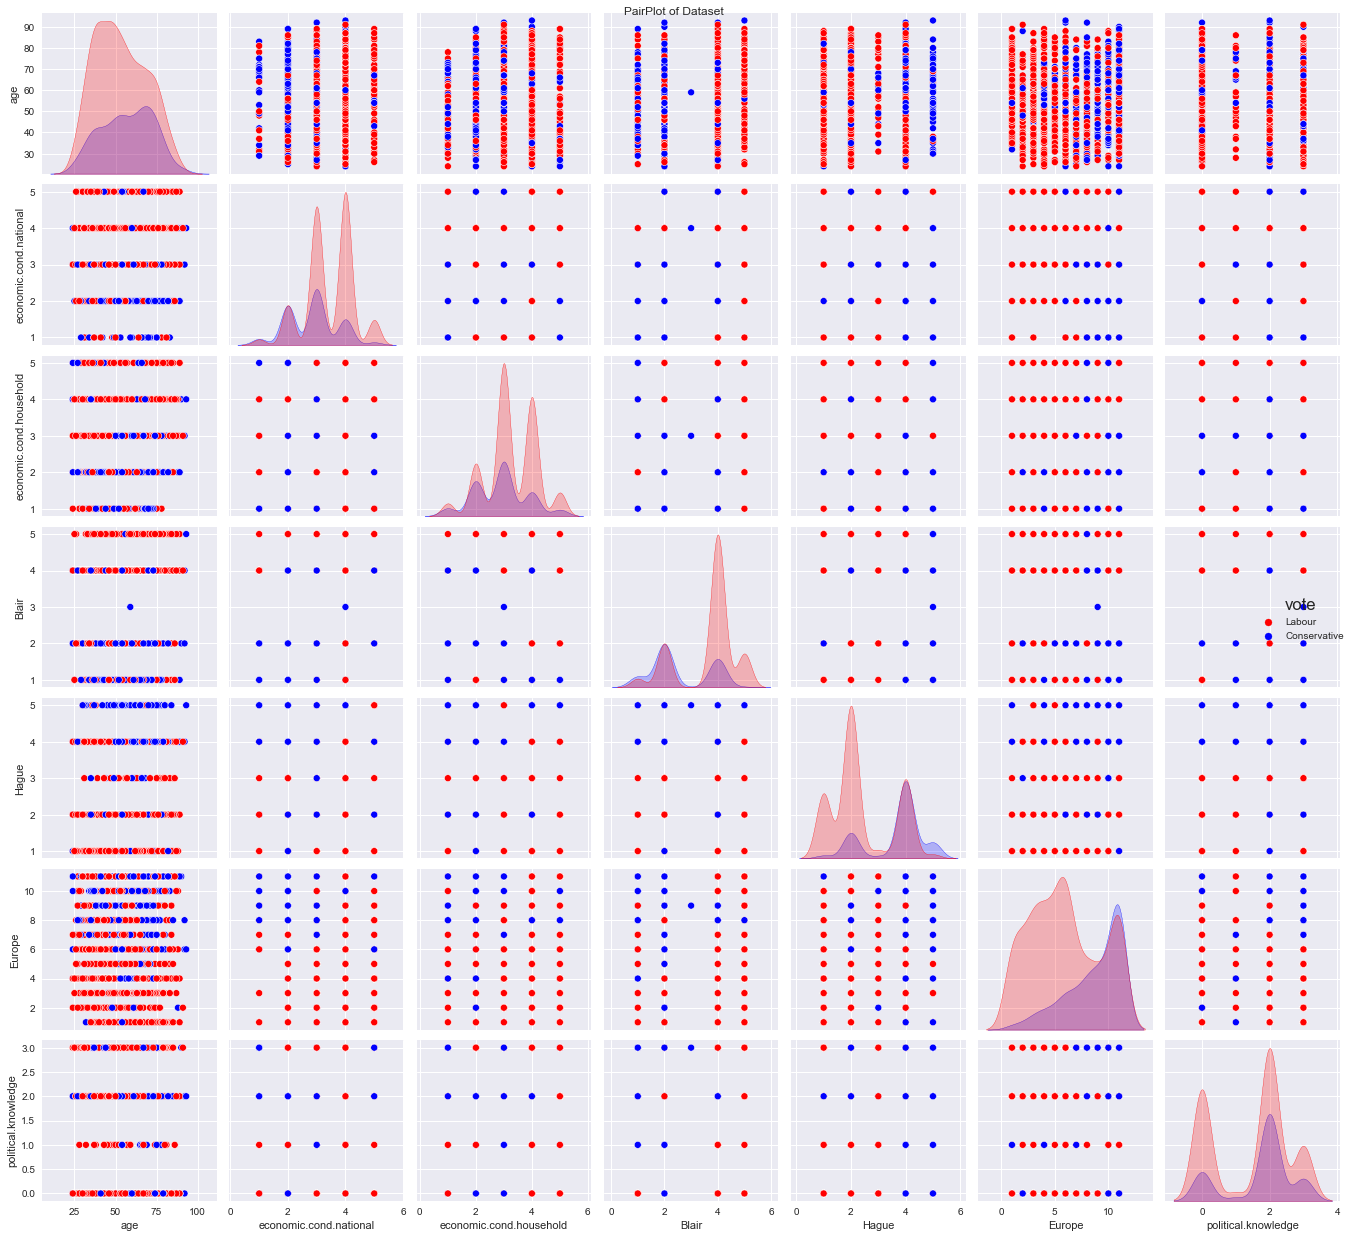

In [211]:
plt.tight_layout()
pairplot = sns.pairplot(df,diag_kind='kde',hue='vote',palette=['red','blue'])
pairplot.fig.suptitle("PairPlot of Dataset")
plt.tight_layout();

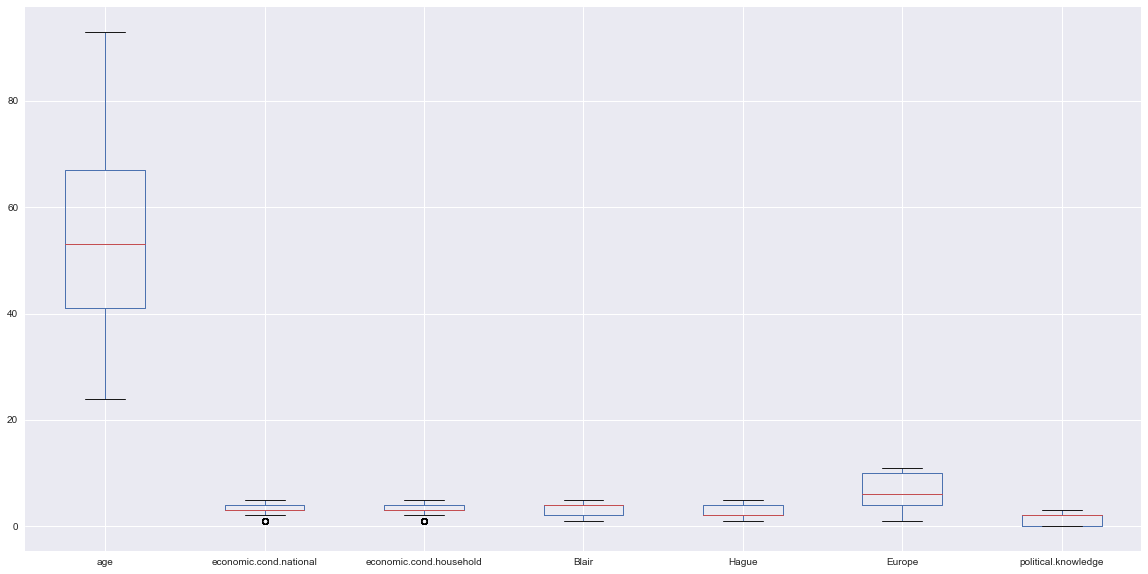

In [212]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

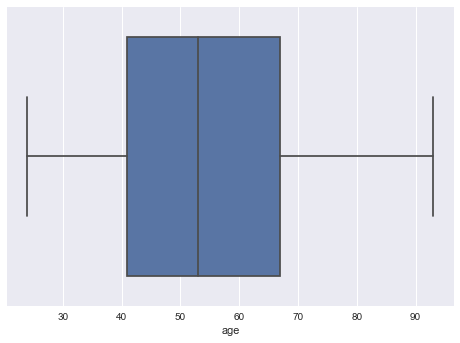

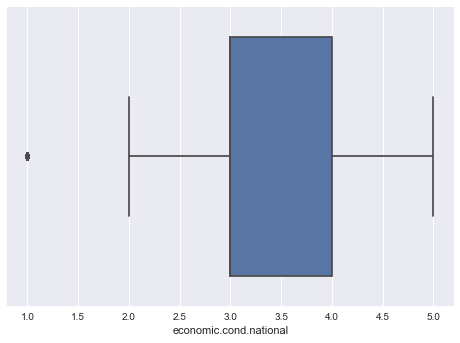

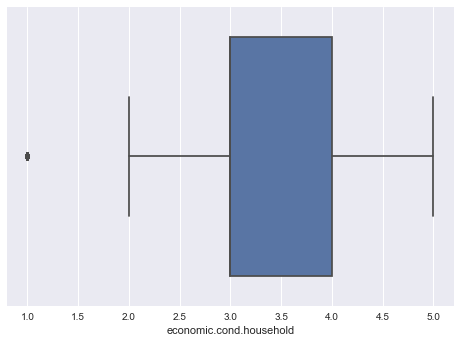

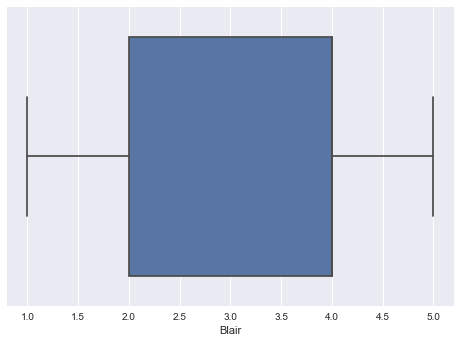

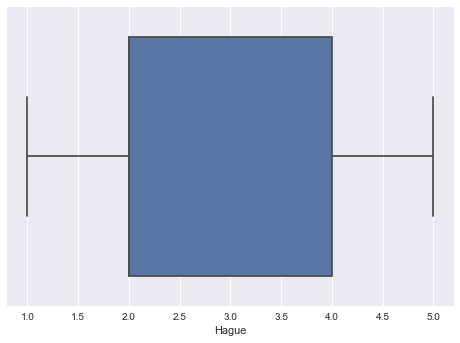

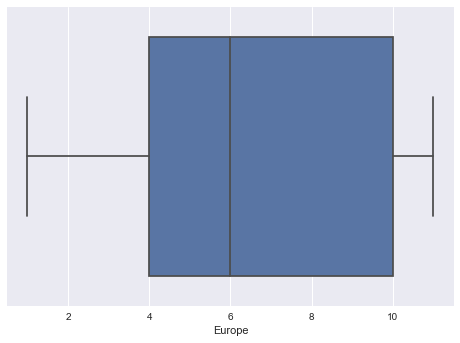

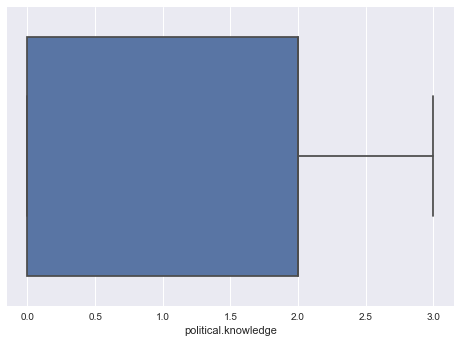

In [213]:
cols = ['age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

In [214]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [215]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

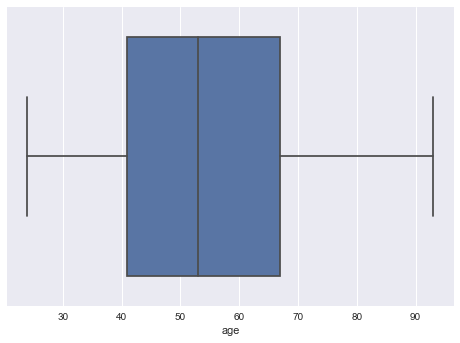

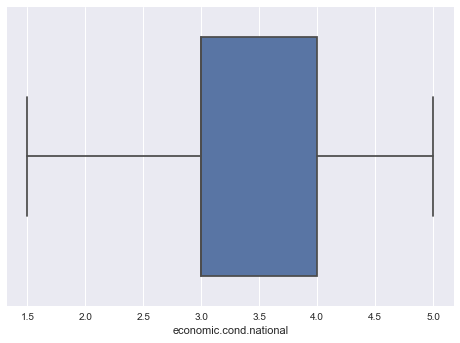

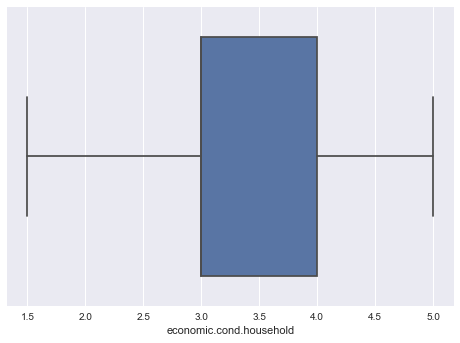

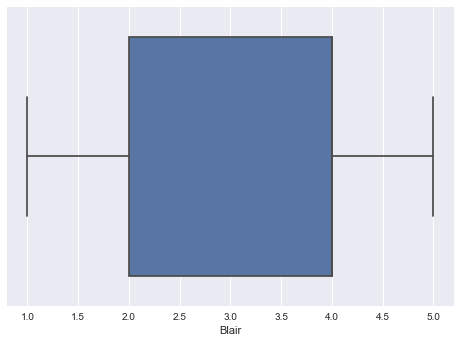

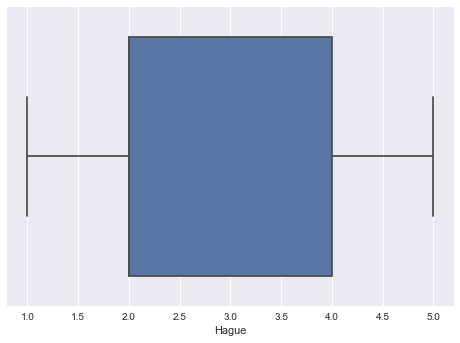

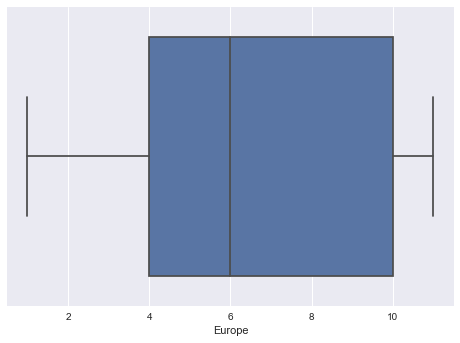

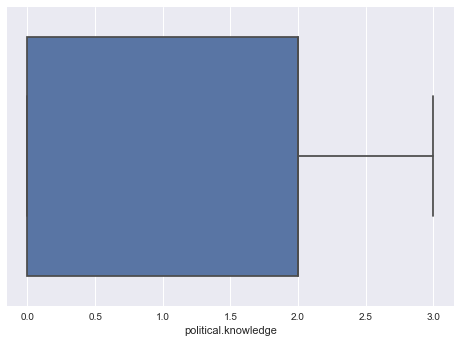

In [216]:
cols = ['age','economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

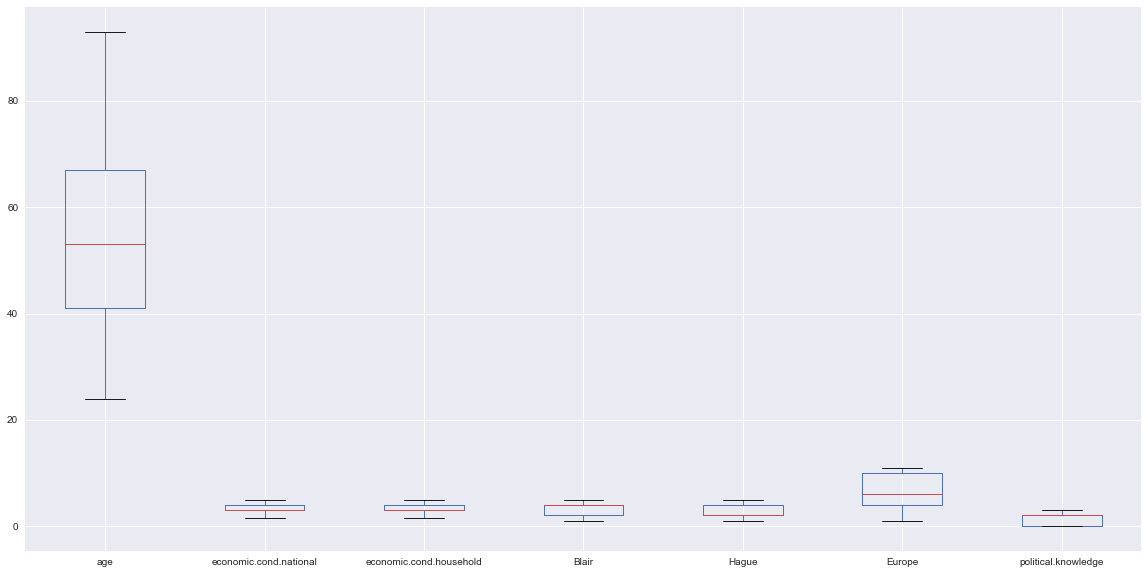

In [217]:
plt.figure(figsize=(20,10))
df.boxplot()
plt.show()

### SKEWNESS VALUE:

In [218]:
# Let's check the skewness values quantitativel y
df.skew().sort_values(ascending=False)

Hague                      0.146191
age                        0.139800
economic.cond.household    0.091833
economic.cond.national    -0.069946
Europe                    -0.141891
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

Observe the independent variables variance and check for variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.

In [219]:
df.var()

age                        246.544655
economic.cond.national       0.728713
economic.cond.household      0.785491
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
dtype: float64

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [220]:
#adding a new column category for the age group. 
category = pd.cut(df.age,
                  bins=[0,35,50,65,80,99],
                  labels=[1,2,3,4,5])
df.insert(6,'Age_Group',category)
df['Age_Group'].value_counts()

2    475
3    415
4    366
1    199
5     62
Name: Age_Group, dtype: int64

In [221]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political.knowledge']


In [222]:
df = pd.get_dummies(df, columns = {'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political.knowledge'})

In [223]:
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)

In [224]:
# Dropping age 
df = df.drop('age', axis = 1)

In [225]:
df.vote.value_counts()
#0 : Conservative and 1 : Labour 

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [226]:
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1

vote  political.knowledge_0.0  political.knowledge_1.0  \
0     1                        0                        0   
1     1                        0                        0   
2     1                        0                        0   
3     1                        1                        0   
4     1                        0                        0   

   political.knowledge_2.0  political.knowledge_3.0  \
0                        1                        0   
1                        1                        0   
2                        1                        0   
3                        0                        0   
4                        1                        0   

   economic.cond.national_1.5  economic.cond.national_2.0  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   economic.cond.national_3.0  economic.cond.national_4.0  \
0                           1                           0   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   economic.cond.national_5.0  ...  Hague_2.0  Hague_3.0  Hague_4.0  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          1          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   

   Hague_5.0  Age_Group_1  Age_Group_2  Age_Group_3  Age_Group_4  Age_Group_5  \
0          0            0            1            0            0            0   
1          0            0            1            0            0            0   
2          0            1            0            0            0            0   
3          0            1            0            0            0            0   
4          0            0            1            0            0            0   

   gender_male  
0            0  
1            1  
2            1  
3            0  
4            1  

[5 rows x 42 columns]

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   vote                         1517 non-null   int8 
 1   political.knowledge_0.0      1517 non-null   uint8
 2   political.knowledge_1.0      1517 non-null   uint8
 3   political.knowledge_2.0      1517 non-null   uint8
 4   political.knowledge_3.0      1517 non-null   uint8
 5   economic.cond.national_1.5   1517 non-null   uint8
 6   economic.cond.national_2.0   1517 non-null   uint8
 7   economic.cond.national_3.0   1517 non-null   uint8
 8   economic.cond.national_4.0   1517 non-null   uint8
 9   economic.cond.national_5.0   1517 non-null   uint8
 10  Blair_1.0                    1517 non-null   uint8
 11  Blair_2.0                    1517 non-null   uint8
 12  Blair_3.0                    1517 non-null   uint8
 13  Blair_4.0                    1517 non-null   uin

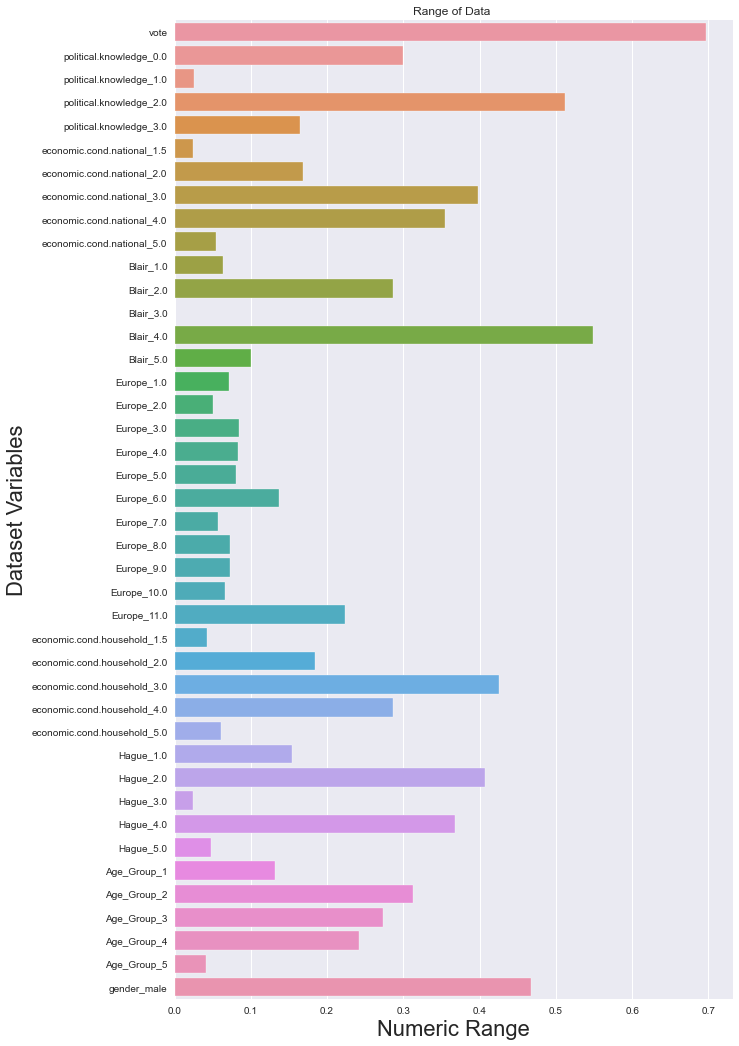

In [228]:
plt.figure(figsize=(10,18))
sns.barplot(data=df,orient='h',ci=False)
plt.ylabel("Dataset Variables",fontsize=22)
plt.xlabel("Numeric Range",fontsize=22)
plt.title("Range of Data ")
plt.show()

### Converting objects to categorical codes.

In [229]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [230]:
## Applying the created Label Encoder object for the target class
## Assigning the 0 to <=50k and 1 to >50k

df['vote'] = LE.fit_transform(df['vote'])
df.head()

vote  political.knowledge_0.0  political.knowledge_1.0  \
0     1                        0                        0   
1     1                        0                        0   
2     1                        0                        0   
3     1                        1                        0   
4     1                        0                        0   

   political.knowledge_2.0  political.knowledge_3.0  \
0                        1                        0   
1                        1                        0   
2                        1                        0   
3                        0                        0   
4                        1                        0   

   economic.cond.national_1.5  economic.cond.national_2.0  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   economic.cond.national_3.0  economic.cond.national_4.0  \
0                           1                           0   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   economic.cond.national_5.0  ...  Hague_2.0  Hague_3.0  Hague_4.0  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          1          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   

   Hague_5.0  Age_Group_1  Age_Group_2  Age_Group_3  Age_Group_4  Age_Group_5  \
0          0            0            1            0            0            0   
1          0            0            1            0            0            0   
2          0            1            0            0            0            0   
3          0            1            0            0            0            0   
4          0            0            1            0            0            0   

   gender_male  
0            0  
1            1  
2            1  
3            0  
4            1  

[5 rows x 42 columns]

In [231]:
## Converting the other 'object' type variables as dummy variables

df_dummy = pd.get_dummies(df,drop_first=True)
df_dummy.head()

vote  political.knowledge_0.0  political.knowledge_1.0  \
0     1                        0                        0   
1     1                        0                        0   
2     1                        0                        0   
3     1                        1                        0   
4     1                        0                        0   

   political.knowledge_2.0  political.knowledge_3.0  \
0                        1                        0   
1                        1                        0   
2                        1                        0   
3                        0                        0   
4                        1                        0   

   economic.cond.national_1.5  economic.cond.national_2.0  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   economic.cond.national_3.0  economic.cond.national_4.0  \
0                           1                           0   
1                           0                           1   
2                           0                           1   
3                           0                           1   
4                           0                           0   

   economic.cond.national_5.0  ...  Hague_2.0  Hague_3.0  Hague_4.0  \
0                           0  ...          0          0          0   
1                           0  ...          0          0          1   
2                           0  ...          1          0          0   
3                           0  ...          0          0          0   
4                           0  ...          0          0          0   

   Hague_5.0  Age_Group_1  Age_Group_2  Age_Group_3  Age_Group_4  Age_Group_5  \
0          0            0            1            0            0            0   
1          0            0            1            0            0            0   
2          0            1            0            0            0            0   
3          0            1            0            0            0            0   
4          0            0            1            0            0            0   

   gender_male  
0            0  
1            1  
2            1  
3            0  
4            1  

[5 rows x 42 columns]

### Train Test Split

In [232]:
# Copy all the predictor variables into X dataframe
X = df_dummy.drop('vote', axis=1)

# Copy target into the y dataframe. 
y = df_dummy['vote']

In [233]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_dummy['vote'])

In [234]:
#Checking the dimensions of the training and test data
print("Dimensions of the training and test data")
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Observations are',1517)

Dimensions of the training and test data
X_train (1061, 41)
X_test (456, 41)
y_train (1061,)
y_test (456,)
Total Observations are 1517


In [235]:
print("Dimensions of the training and test data")
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)
print("Total number of Observations are",1517)

Dimensions of the training and test data
Number of rows and columns of the training set for the independent variables: (1061, 41)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 41)
Number of rows and columns of the test set for the dependent variable: (456,)
Total number of Observations are 1517


In [236]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [237]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote, dtype: float64

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). 

### Logistic Regression Model

In [527]:
from sklearn.linear_model import LogisticRegression

In [528]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.5s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [529]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

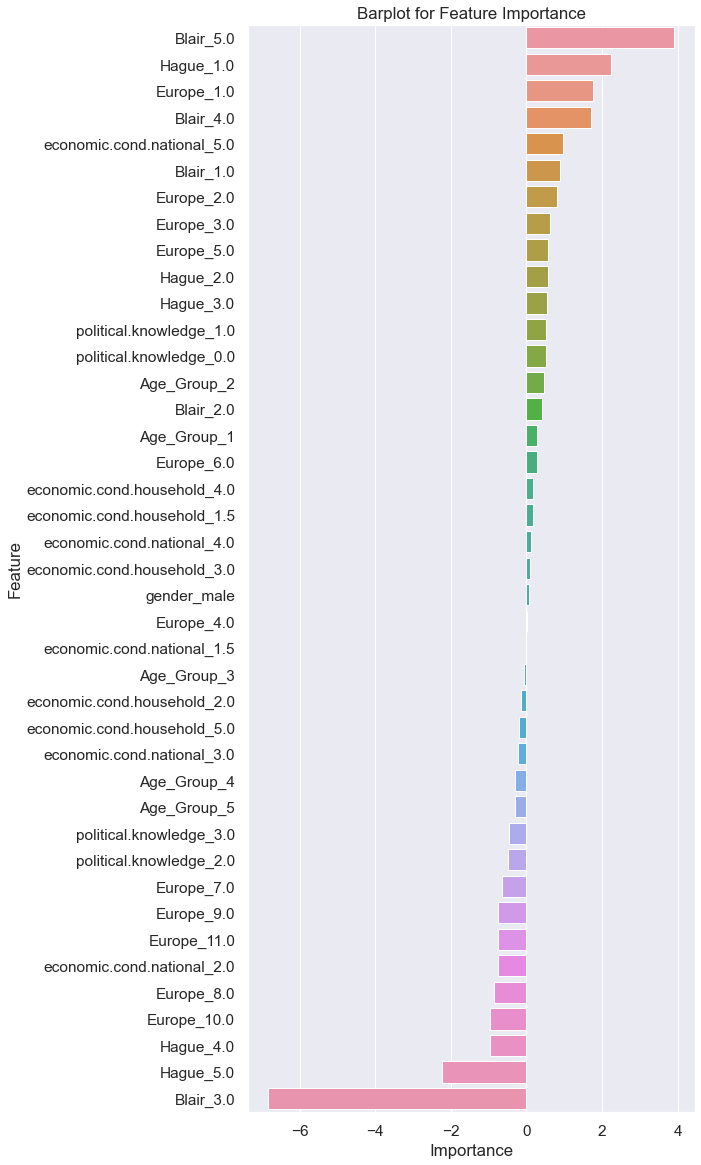

In [530]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(8,20))
sns.barplot(y='Feature', x='Importance', data=feature_rank)
plt.title("Barplot for Feature Importance");

In [531]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [532]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [533]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.85
logit_train_precision  0.77
logit_train_recall  0.71
logit_train_f1  0.74


### Getting the Predicted Classes and Probs

In [534]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.236198  0.763802
1  0.709766  0.290234
2  0.099064  0.900936
3  0.054625  0.945375
4  0.140135  0.859865

### Model Evaluation

In [535]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8482563619227145

### AUC and ROC for the training data

AUC: 0.894


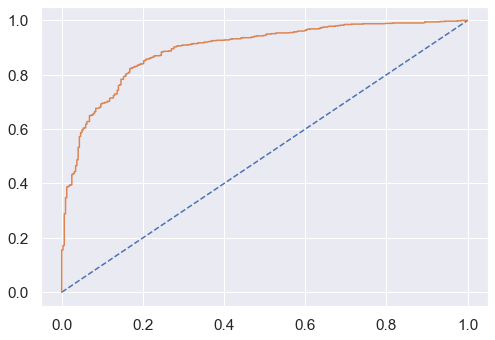

In [536]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [248]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.84
logit_test_precision  0.76
logit_test_recall  0.67
logit_test_f1  0.71


In [537]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8355263157894737

### AUC and ROC for the test data

AUC: 0.894


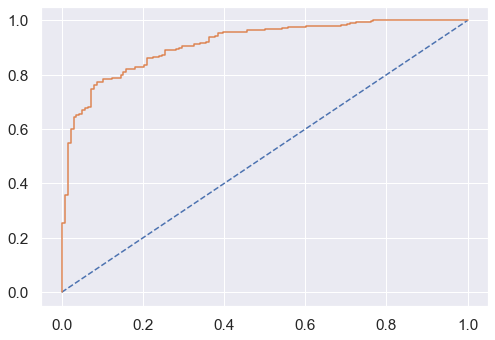

In [538]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [539]:
confusion_matrix(y_train, ytrain_predict)

array([[230,  92],
       [ 69, 670]], dtype=int64)

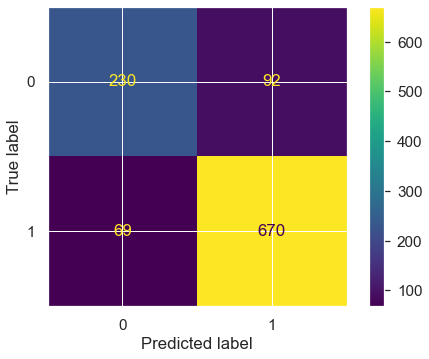

In [540]:
plot_confusion_matrix(model,X_train,y_train);

In [253]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



### Confusion Matrix for test data

In [254]:
confusion_matrix(y_test, ytest_predict)

array([[ 93,  45],
       [ 30, 288]], dtype=int64)

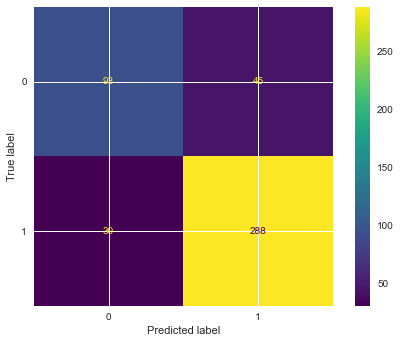

In [255]:
plot_confusion_matrix(model,X_test,y_test);

In [256]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



AUC for Training data = 0.8939455702266786
AUC for Test data = 0.9138638228055782


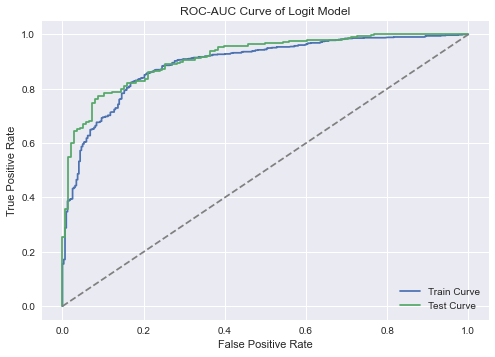

In [257]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of Logit Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

In [258]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

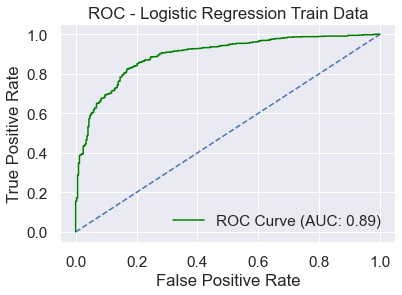

logit_train_auc 0.8939455702266786


In [259]:
logit_train_auc1, logit_train_fpr, logit_train_tpr = draw_auc_roc(model, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')

print('logit_train_auc', logit_train_auc1)

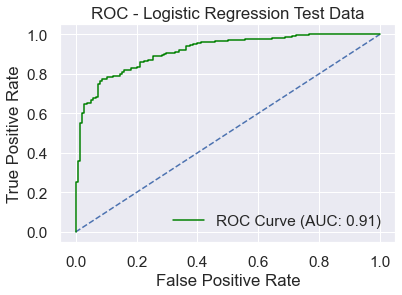

logit_test_auc 0.9138638228055782


In [260]:
logit_test_auc1, logit_test_fpr, logit_test_tpr = draw_auc_roc(model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

### Applying GridSearchCV for Logistic Regression

In [261]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [262]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [263]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [264]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [265]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [266]:
best_model = grid_search.best_estimator_

In [267]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [268]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.236192  0.763808
1  0.709757  0.290243
2  0.099065  0.900935
3  0.054624  0.945376
4  0.140139  0.859861

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.82      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061
 



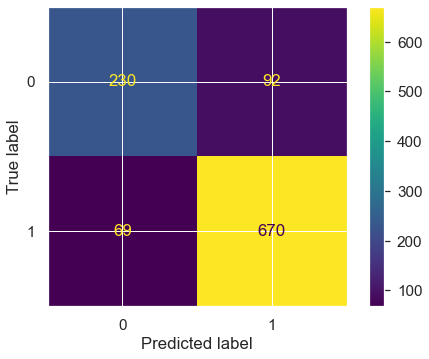

In [269]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456
 



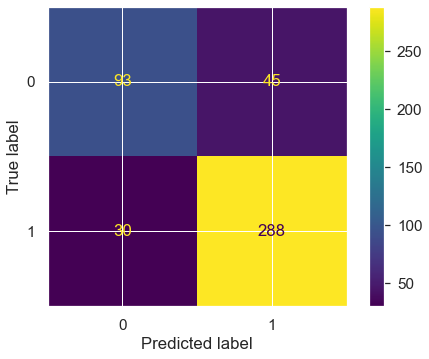

In [270]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### LDA Model

In [271]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [272]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

### Prediction

In [273]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [274]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [275]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

0         1
0  0.181276  0.818724
1  0.797617  0.202383
2  0.192100  0.807900
3  0.022838  0.977162
4  0.081163  0.918837
5  0.133976  0.866024
6  0.980547  0.019453
7  0.018208  0.981792
8  0.026090  0.973910
9  0.161445  0.838555

In [276]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.84
LDA_train_precision  0.75
LDA_train_recall  0.72
LDA_train_f1  0.73


In [277]:
print("Classification report of Train Data")
LDA_train_met1

Classification report of Train Data


precision    recall  f1-score      support
0              0.745161  0.717391  0.731013   322.000000
1              0.878828  0.893099  0.885906   739.000000
accuracy       0.839774  0.839774  0.839774     0.839774
macro avg      0.811995  0.805245  0.808459  1061.000000
weighted avg   0.838262  0.839774  0.838898  1061.000000

In [278]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.85
LDA_test_precision  0.77
LDA_test_recall  0.72
LDA_test_f1  0.74


In [279]:
print("Classification report of Test Data")
LDA_test_met1

Classification report of Test Data


precision    recall  f1-score     support
0              0.767442  0.717391  0.741573  138.000000
1              0.880734  0.905660  0.893023  318.000000
accuracy       0.848684  0.848684  0.848684    0.848684
macro avg      0.824088  0.811526  0.817298  456.000000
weighted avg   0.846448  0.848684  0.847190  456.000000

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



<Figure size 720x432 with 0 Axes>

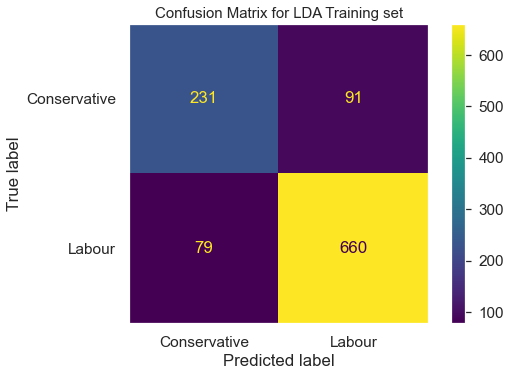

In [280]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LDA Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



<Figure size 720x432 with 0 Axes>

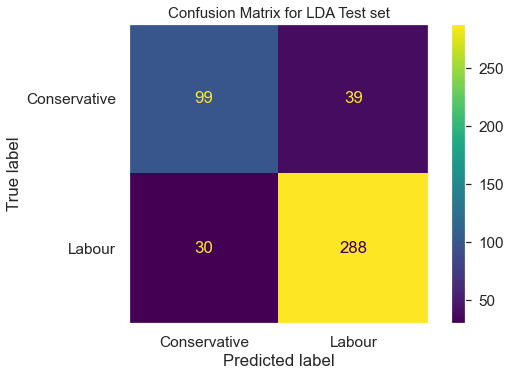

In [281]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LDA Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

AUC for Training data = 0.8881924541305608
AUC for Test data = 0.9182845684076201


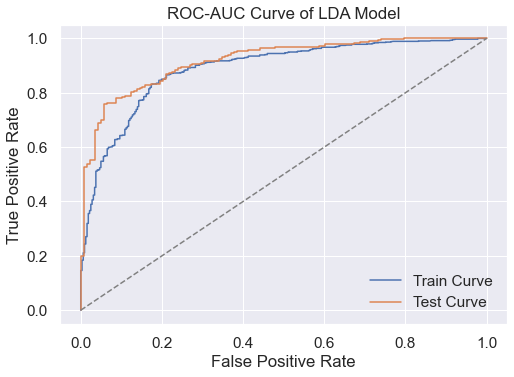

In [282]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

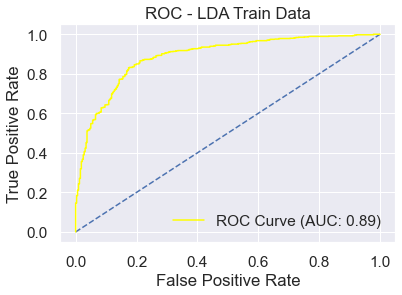

LDA_train_auc 0.8881924541305608


In [283]:
LDA_train_auc1, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(model, X_train, y_train, 'yellow', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc1)

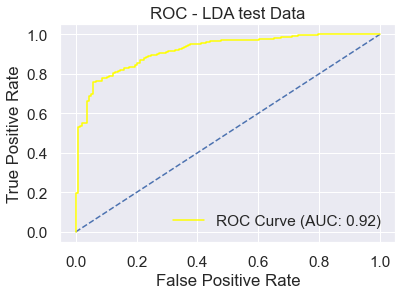

LDA_test_auc 0.9182845684076201


In [284]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

### How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Accuracy Score 0.754
F1 Score 0.8485 

Confusion Matrix


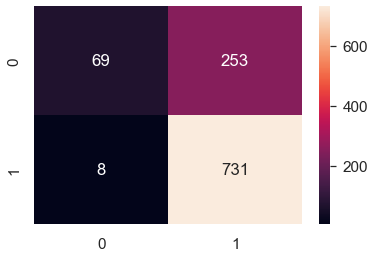

0.2 

Accuracy Score 0.7945
F1 Score 0.8677 

Confusion Matrix


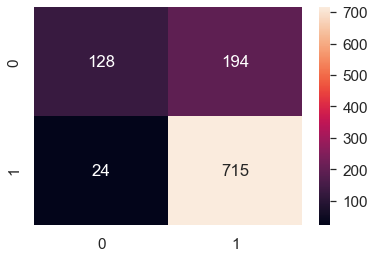

0.3 

Accuracy Score 0.8124
F1 Score 0.8752 

Confusion Matrix


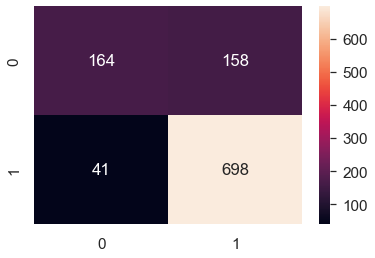

0.4 

Accuracy Score 0.8322
F1 Score 0.8841 

Confusion Matrix


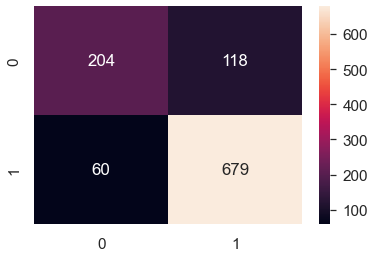

0.5 

Accuracy Score 0.8398
F1 Score 0.8859 

Confusion Matrix


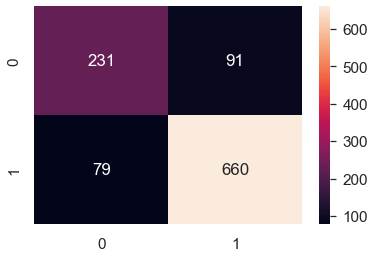

0.6 

Accuracy Score 0.8426
F1 Score 0.8846 

Confusion Matrix


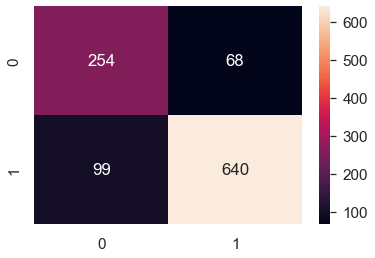

0.7 

Accuracy Score 0.82
F1 Score 0.8631 

Confusion Matrix


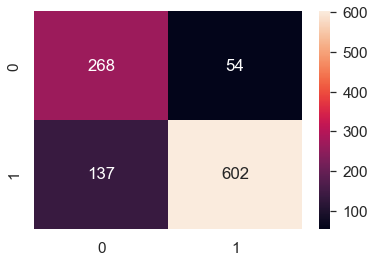

0.8 

Accuracy Score 0.7813
F1 Score 0.8263 

Confusion Matrix


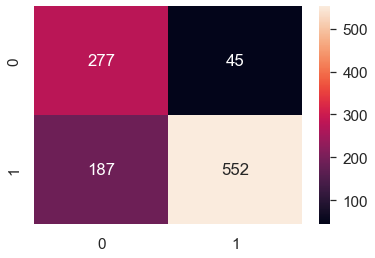

0.9 

Accuracy Score 0.7012
F1 Score 0.7391 

Confusion Matrix


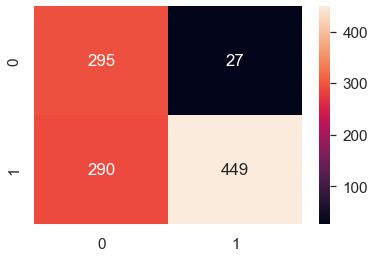

In [285]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(LR_train_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that 0.5 and 0.6 gives better accuracy than the rest of the custom cut-off values. But 0.5 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.5 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [286]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(LR_test_predict_prob[:,1])):
    if np.array(LR_test_predict_prob[:,1])[i]>0.5:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

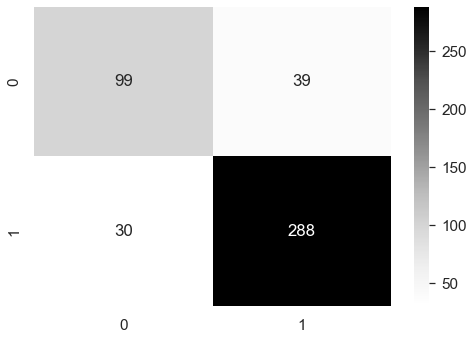

In [287]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [288]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. 

### KNN

For naive bayes algorithm while calculating likelihoods of numerical features it assumes the feature to be normally distributed and then we calculate probability using mean and variance of that feature only and also it assumes that all the predictors are independent to each other. Scale doesn’t matter. Performing a features scaling in this algorithms may not have much effect.

Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN

In [289]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [290]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [291]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [292]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [293]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.84
KNN_train_precision  0.77
KNN_train_recall  0.68
KNN_train_f1  0.72


In [294]:
print("Classification report of Train Data")
KNN_train_met1

Classification report of Train Data


precision    recall  f1-score      support
0              0.773852  0.680124  0.723967   322.000000
1              0.867609  0.913396  0.889914   739.000000
accuracy       0.842601  0.842601  0.842601     0.842601
macro avg      0.820730  0.796760  0.806941  1061.000000
weighted avg   0.839155  0.842601  0.839551  1061.000000

In [295]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.82
KNN_test_precision  0.72
KNN_test_recall  0.67
KNN_test_f1  0.7


In [296]:
print("Classification report of Test Data")
KNN_test_met1

Classification report of Test Data


precision    recall  f1-score     support
0              0.720930  0.673913  0.696629  138.000000
1              0.862385  0.886792  0.874419  318.000000
accuracy       0.822368  0.822368  0.822368    0.822368
macro avg      0.791658  0.780353  0.785524  456.000000
weighted avg   0.819577  0.822368  0.820614  456.000000

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



<Figure size 720x432 with 0 Axes>

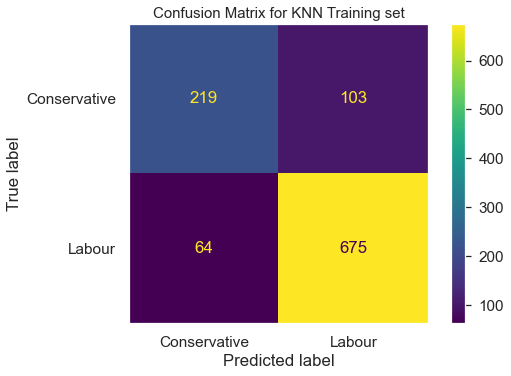

In [297]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for KNN Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       138
           1       0.86      0.89      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456
 



<Figure size 720x432 with 0 Axes>

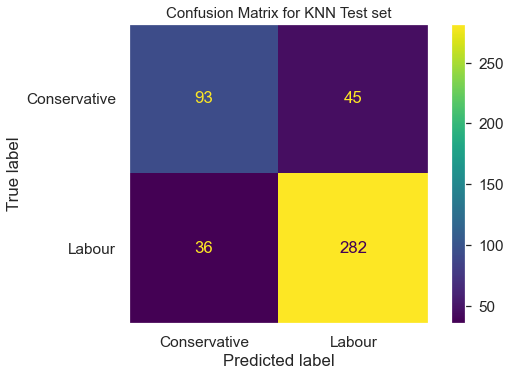

In [298]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for KNN Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

In [299]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

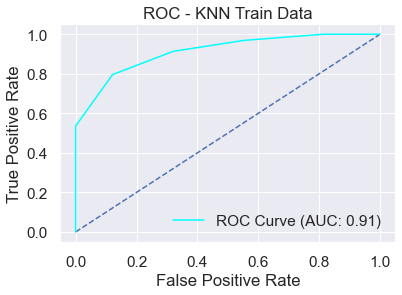

KNN_train_auc 0.9128354583581978


In [300]:
KNN_train_auc1, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc1)

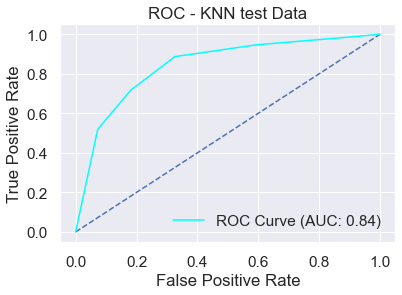

KNN_test_auc 0.8426761462036277


In [301]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

AUC for Training data = 0.9128354583581978
AUC for Test data = 0.8426761462036277


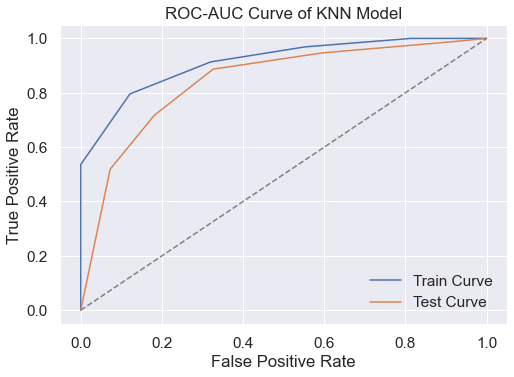

In [302]:
LR_train_predict_prob = KNN_model.predict_proba(X_train)
LR_test_predict_prob = KNN_model.predict_proba(X_test)
LR_pred_train_prob = KNN_model.predict_proba(X_train)
LR_pred_test_prob = KNN_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of KNN Model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Default value n_neighbors=5, lets check the performance for K=7

In [303]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [304]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.827521206409048
[[208 114]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



In [305]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 86  52]
 [ 32 286]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67       138
           1       0.85      0.90      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



In [306]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# initiantiate learning model (k = 3)
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 5)
KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

# initiantiate learning model (k = 9)
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')

# fitting the model
KNN_model.fit(X_train,y_train)

# predict the response
y_test_predict = KNN_model.predict(X_test)

# evaluate accuracy
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8179824561403509
Accuracy Score for K=5 is  0.8223684210526315
Accuracy Score for K=9 is  0.8201754385964912


Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error

Hint: Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [307]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2171052631578947,
 0.18201754385964908,
 0.17763157894736847,
 0.1842105263157895,
 0.17982456140350878,
 0.17543859649122806,
 0.1864035087719298,
 0.18201754385964908,
 0.1842105263157895,
 0.17105263157894735]

### Plot misclassification error vs k (with k value on X-axis) using matplotlib

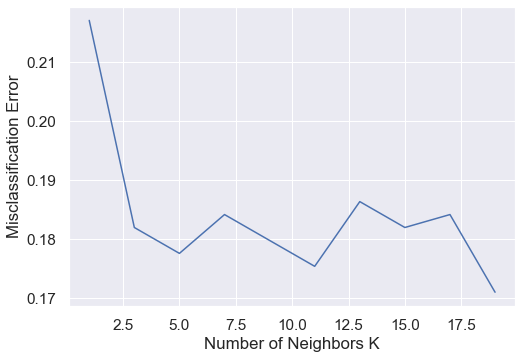

In [308]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

For K = 11 it is giving the best test accuracy lets check train and test for K=13 with other evaluation metrics

In [309]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [310]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.820923656927427
[[201 121]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.68       322
           1       0.85      0.91      0.88       739

    accuracy                           0.82      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.82      0.82      0.82      1061



In [311]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[ 86  52]
 [ 33 285]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67       138
           1       0.85      0.90      0.87       318

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



In [312]:
0.8548539114043355 - 0.8179824561403509

0.03687145526398461

As the difference between train and test accuracies is 3.68 % which is less than 10%(Industry standard).So, it is a valid model

### Gaussian Naive Bayes

In [313]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [314]:
MNB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [315]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [316]:
ytest_predict_prob=MNB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

0         1
185  0.943280  0.056720
220  0.812498  0.187502
129  0.126984  0.873016
78   0.909440  0.090560
97   0.114793  0.885207
401  0.012614  0.987386
387  0.088575  0.911425
384  0.027544  0.972456
7    0.004174  0.995826
222  0.005636  0.994364

In [317]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.83
MNB_train_precision  0.72
MNB_train_recall  0.71
MNB_train_f1  0.71


In [318]:
print("Classification report of Train Data")
MNB_train_met1

Classification report of Train Data


precision    recall  f1-score      support
0              0.717868  0.711180  0.714509   322.000000
1              0.874663  0.878214  0.876435   739.000000
accuracy       0.827521  0.827521  0.827521     0.827521
macro avg      0.796266  0.794697  0.795472  1061.000000
weighted avg   0.827078  0.827521  0.827292  1061.000000

In [319]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.84
MNB_test_precision  0.74
MNB_test_recall  0.72
MNB_test_f1  0.73


In [320]:
print("Classification report of Test Data")
MNB_test_met1

Classification report of Test Data


precision    recall  f1-score     support
0              0.740741  0.724638  0.732601  138.000000
1              0.881620  0.889937  0.885759  318.000000
accuracy       0.839912  0.839912  0.839912    0.839912
macro avg      0.811180  0.807287  0.809180  456.000000
weighted avg   0.838985  0.839912  0.839408  456.000000

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       322
           1       0.87      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 



<Figure size 720x432 with 0 Axes>

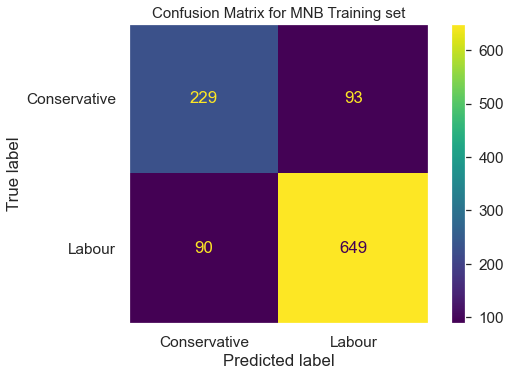

In [321]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(MNB_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for MNB Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       138
           1       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



<Figure size 720x432 with 0 Axes>

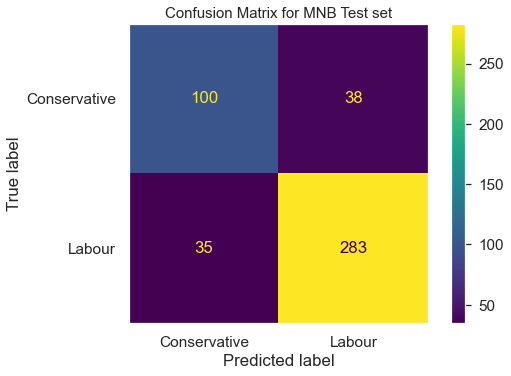

In [322]:
## Confusion matrix on the test data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(MNB_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for MNB Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

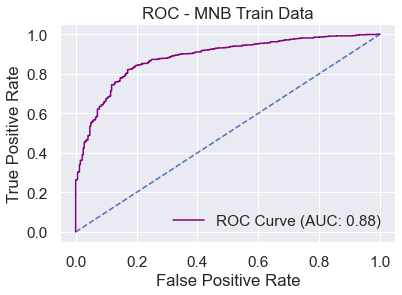

MNB_train_auc 0.8833890854688642


In [323]:
MNB_train_auc1, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'purple', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc1)

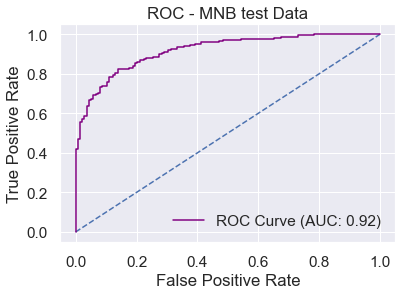

MNB_test_auc 0.9170540515905569


In [324]:
MNB_test_auc1, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc1)

AUC for Training data = 0.8833890854688642
AUC for Test data = 0.9170540515905569


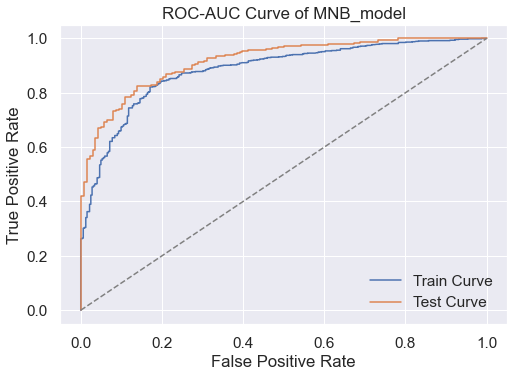

In [325]:
LR_train_predict_prob = MNB_model.predict_proba(X_train)
LR_test_predict_prob = MNB_model.predict_proba(X_test)
LR_pred_train_prob = MNB_model.predict_proba(X_train)
LR_pred_test_prob = MNB_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(MNB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(MNB_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of MNB_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

*Looking at Recalls, Training accuracy and Test accuracy. Model seems to be performing well

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

In [326]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [327]:
df.vote.value_counts()

1    1057
0     460
Name: vote, dtype: int64

### Model Tuning

In [328]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

In [329]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1061, 41)
After SMOTE:  (1478, 41)


### Linear Regression with SMOTE

In [330]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [331]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [332]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.85
logit_res_test_precision  0.79
logit_res_test_recall  0.69
logit_res_test_f1  0.74


In [333]:
logit_test_met2

precision    recall  f1-score     support
0              0.791667  0.688406  0.736434  138.000000
1              0.872024  0.921384  0.896024  318.000000
accuracy       0.850877  0.850877  0.850877    0.850877
macro avg      0.831845  0.804895  0.816229  456.000000
weighted avg   0.847705  0.850877  0.847727  456.000000

In [334]:
logit_test_met1

precision    recall  f1-score     support
0              0.756098  0.673913  0.712644  138.000000
1              0.864865  0.905660  0.884793  318.000000
accuracy       0.835526  0.835526  0.835526    0.835526
macro avg      0.810481  0.789787  0.798718  456.000000
weighted avg   0.831948  0.835526  0.832695  456.000000

### LDA with SMOTE

In [335]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [336]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [337]:
LDA_test_met1,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.7
LDA_res_test_precision  0.0
LDA_res_test_recall  0.0
LDA_res_test_f1  0.0


In [338]:
LDA_test_met1

precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  138.000000
1              0.697368  1.000000  0.821705  318.000000
accuracy       0.697368  0.697368  0.697368    0.697368
macro avg      0.348684  0.500000  0.410853  456.000000
weighted avg   0.486323  0.697368  0.573031  456.000000

### KNN with SMOTE

In [339]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [340]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [341]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.82
KNN_res_test_precision  0.74
KNN_res_test_recall  0.64
KNN_res_test_f1  0.69


In [342]:
KNN_test_met2

precision    recall  f1-score     support
0              0.735537  0.644928  0.687259  138.000000
1              0.853731  0.899371  0.875957  318.000000
accuracy       0.822368  0.822368  0.822368    0.822368
macro avg      0.794634  0.772149  0.781608  456.000000
weighted avg   0.817962  0.822368  0.818851  456.000000

### SVM with SMOTE

In [343]:
from sklearn import svm

In [344]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [345]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [346]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [347]:
SVM_test_met2,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.7
SVM_res_test_precision  0.0
SVM_res_test_recall  0.0
SVM_res_test_f1  0.0


In [348]:
SVM_test_met2

precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  138.000000
1              0.697368  1.000000  0.821705  318.000000
accuracy       0.697368  0.697368  0.697368    0.697368
macro avg      0.348684  0.500000  0.410853  456.000000
weighted avg   0.486323  0.697368  0.573031  456.000000

### MNB with SMOTE

In [349]:
from sklearn.naive_bayes import MultinomialNB

In [350]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [351]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [352]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.74
MNB_res_test_precision  0.61
MNB_res_test_recall  0.41
MNB_res_test_f1  0.49


In [353]:
MNB_test_met2

precision    recall  f1-score     support
0              0.608696  0.405797  0.486957  138.000000
1              0.774725  0.886792  0.826979  318.000000
accuracy       0.741228  0.741228  0.741228    0.741228
macro avg      0.691710  0.646295  0.656968  456.000000
weighted avg   0.724479  0.741228  0.724078  456.000000

### Hyperparameter tuning using GridsearchCV

### Logistic Regression with GridSearchCV

In [354]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10,n_jobs=-1)
#logit_model3 = LogisticRegression(C = 1.438449888287663, penalty = 'l2', solver = 'newton-cg', class_weight = class_weight)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [355]:
print ("Best Parametres from",logit_model3.best_estimator_)

Best Parametres from LogisticRegression(C=54.555947811685144, class_weight={0: 2, 1: 1},
                   penalty='none', solver='sag')


In [356]:
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [357]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.83
logit_train_precision  0.68
logit_train_recall  0.82
logit_train_f1  0.74


In [358]:
logit_train_met3

precision    recall  f1-score      support
0              0.679487  0.822981  0.744382   322.000000
1              0.915052  0.830853  0.870922   739.000000
accuracy       0.828464  0.828464  0.828464     0.828464
macro avg      0.797270  0.826917  0.807652  1061.000000
weighted avg   0.843561  0.828464  0.832519  1061.000000

In [359]:
logit_train_met1 #to compare with 1st iteration

precision    recall  f1-score      support
0              0.769231  0.714286  0.740741   322.000000
1              0.879265  0.906631  0.892738   739.000000
accuracy       0.848256  0.848256  0.848256     0.848256
macro avg      0.824248  0.810458  0.816739  1061.000000
weighted avg   0.845871  0.848256  0.846609  1061.000000

In [360]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.84
logit_test_precision  0.76
logit_test_recall  0.67
logit_test_f1  0.71


In [361]:
logit_test_met3

precision    recall  f1-score     support
0              0.672619  0.818841  0.738562  138.000000
1              0.913194  0.827044  0.867987  318.000000
accuracy       0.824561  0.824561  0.824561    0.824561
macro avg      0.792907  0.822942  0.803274  456.000000
weighted avg   0.840389  0.824561  0.828819  456.000000

In [362]:
logit_test_met1

precision    recall  f1-score     support
0              0.756098  0.673913  0.712644  138.000000
1              0.864865  0.905660  0.884793  318.000000
accuracy       0.835526  0.835526  0.835526    0.835526
macro avg      0.810481  0.789787  0.798718  456.000000
weighted avg   0.831948  0.835526  0.832695  456.000000

              precision    recall  f1-score   support

           0       0.68      0.82      0.74       322
           1       0.92      0.83      0.87       739

    accuracy                           0.83      1061
   macro avg       0.80      0.83      0.81      1061
weighted avg       0.84      0.83      0.83      1061
 



<Figure size 720x432 with 0 Axes>

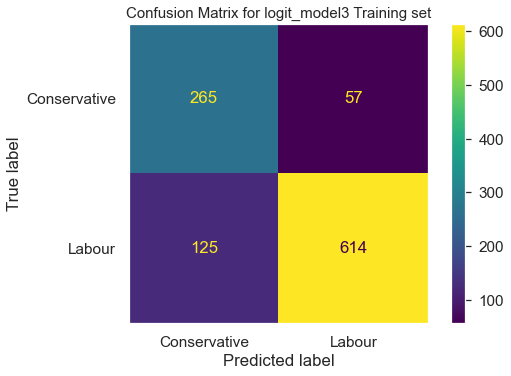

In [363]:
## Confusion matrix on the training data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for logit_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       138
           1       0.91      0.83      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.82      0.80       456
weighted avg       0.84      0.82      0.83       456
 



<Figure size 720x432 with 0 Axes>

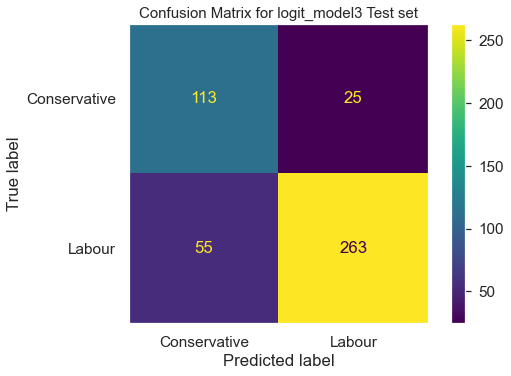

In [364]:
#Confusion matrix on the testing data
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(logit_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for logit_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

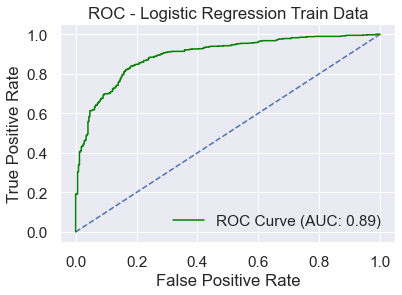

logit_train_auc 0.8945255045007944


In [365]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

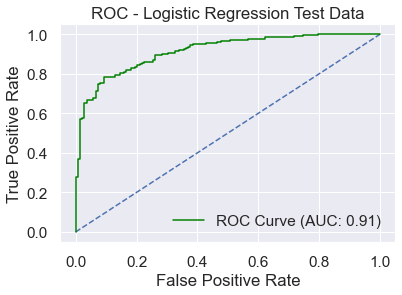

logit_test_auc 0.9136815240178653


In [366]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc3)

AUC for Training data = 0.8945255045007944
AUC for Test data = 0.9136815240178653


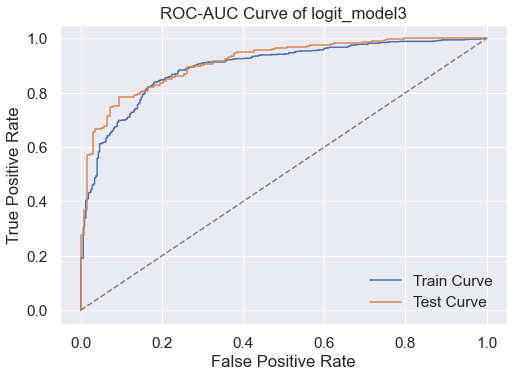

In [367]:
LR_train_predict_prob = logit_model3.predict_proba(X_train)
LR_test_predict_prob = logit_model3.predict_proba(X_test)
LR_pred_train_prob = logit_model3.predict_proba(X_train)
LR_pred_test_prob = logit_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(logit_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(logit_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of logit_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Linear Discriminant Analysis with GridsearchCV

In [368]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [369]:
print("Best Parameters from LDA ",LDA_model3.best_params_)

Best Parameters from LDA  {'solver': 'svd', 'tol': 0.0001}


In [370]:
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [371]:
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.84
LDA_train_precision  0.75
LDA_train_recall  0.72
LDA_train_f1  0.73


In [372]:
LDA_train_met1

precision    recall  f1-score      support
0              0.745161  0.717391  0.731013   322.000000
1              0.878828  0.893099  0.885906   739.000000
accuracy       0.839774  0.839774  0.839774     0.839774
macro avg      0.811995  0.805245  0.808459  1061.000000
weighted avg   0.838262  0.839774  0.838898  1061.000000

In [373]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.85
LDA_test_precision  0.77
LDA_test_recall  0.72
LDA_test_f1  0.74


In [374]:
LDA_test_met3

precision    recall  f1-score     support
0              0.767442  0.717391  0.741573  138.000000
1              0.880734  0.905660  0.893023  318.000000
accuracy       0.848684  0.848684  0.848684    0.848684
macro avg      0.824088  0.811526  0.817298  456.000000
weighted avg   0.846448  0.848684  0.847190  456.000000

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       322
           1       0.88      0.89      0.89       739

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061
 



<Figure size 720x432 with 0 Axes>

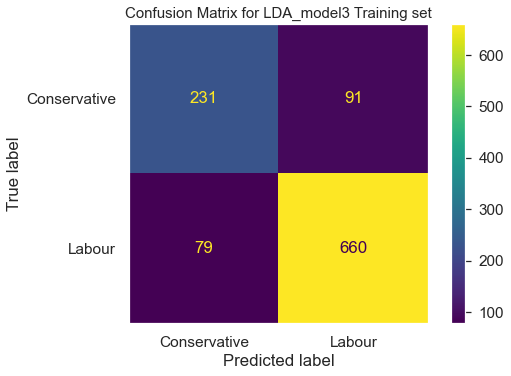

In [375]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for LDA_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       138
           1       0.88      0.91      0.89       318

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456
 



<Figure size 720x432 with 0 Axes>

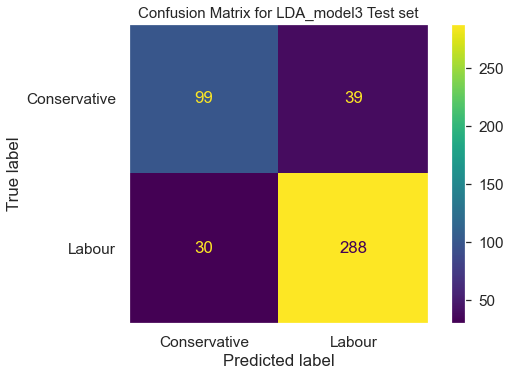

In [376]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(LDA_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for LDA_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

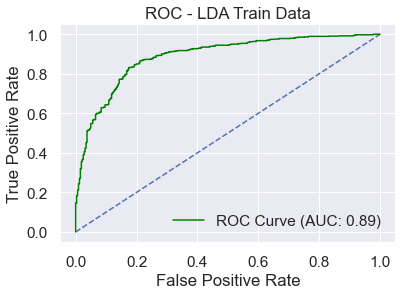

LDA_train_auc 0.8881924541305608


In [377]:
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(LDA_model3, X_train, y_train, 'green', 'ROC - LDA Train Data')
print('LDA_train_auc', logit_train_auc3)

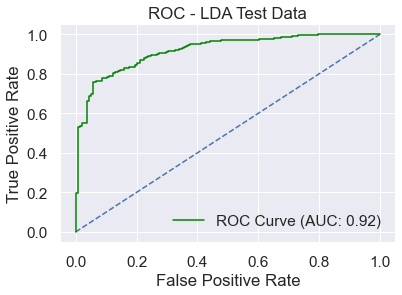

LDA_test_auc 0.9182845684076201


In [378]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(LDA_model3, X_test, y_test, 'green', 'ROC - LDA Test Data')
print('LDA_test_auc', logit_test_auc3)

AUC for Training data = 0.8881924541305608
AUC for Test data = 0.9182845684076201


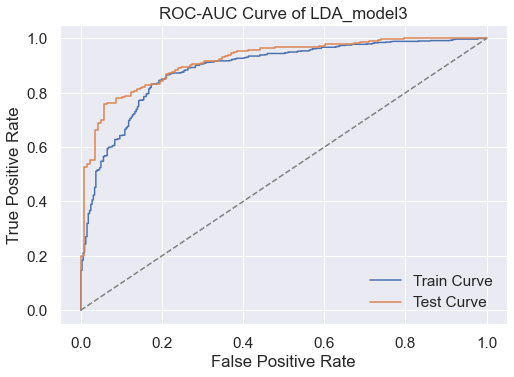

In [379]:
LR_train_predict_prob = LDA_model3.predict_proba(X_train)
LR_test_predict_prob = LDA_model3.predict_proba(X_test)
LR_pred_train_prob = LDA_model3.predict_proba(X_train)
LR_pred_test_prob = LDA_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(LDA_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(LDA_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of LDA_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### KNN Model with GridsearchCV

In [380]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [381]:
print("Best Parameters from KNN Model",KNN_model3.best_params_)

Best Parameters from KNN Model {'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}


In [382]:
ytrain_predict = KNN_model3.predict(X_train)
ytest_predict = KNN_model3.predict(X_test)

In [383]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train, y_train, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.81
KNN_train_precision  0.72
KNN_train_recall  0.64
KNN_train_f1  0.67


In [384]:
KNN_train_met3

precision    recall  f1-score      support
0              0.716783  0.636646  0.674342   322.000000
1              0.849032  0.890392  0.869221   739.000000
accuracy       0.813384  0.813384  0.813384     0.813384
macro avg      0.782908  0.763519  0.771781  1061.000000
weighted avg   0.808896  0.813384  0.810077  1061.000000

In [385]:
KNN_train_met1

precision    recall  f1-score      support
0              0.773852  0.680124  0.723967   322.000000
1              0.867609  0.913396  0.889914   739.000000
accuracy       0.842601  0.842601  0.842601     0.842601
macro avg      0.820730  0.796760  0.806941  1061.000000
weighted avg   0.839155  0.842601  0.839551  1061.000000

In [386]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.83
KNN_test_precision  0.75
KNN_test_recall  0.67
KNN_test_f1  0.7


In [387]:
KNN_test_met3

precision    recall  f1-score    support
0              0.747967  0.666667  0.704981  138.00000
1              0.861862  0.902516  0.881720  318.00000
accuracy       0.831140  0.831140  0.831140    0.83114
macro avg      0.804915  0.784591  0.793351  456.00000
weighted avg   0.827394  0.831140  0.828233  456.00000

In [388]:
KNN_test_met1

precision    recall  f1-score     support
0              0.720930  0.673913  0.696629  138.000000
1              0.862385  0.886792  0.874419  318.000000
accuracy       0.822368  0.822368  0.822368    0.822368
macro avg      0.791658  0.780353  0.785524  456.000000
weighted avg   0.819577  0.822368  0.820614  456.000000

              precision    recall  f1-score   support

           0       0.72      0.64      0.67       322
           1       0.85      0.89      0.87       739

    accuracy                           0.81      1061
   macro avg       0.78      0.76      0.77      1061
weighted avg       0.81      0.81      0.81      1061
 



<Figure size 720x432 with 0 Axes>

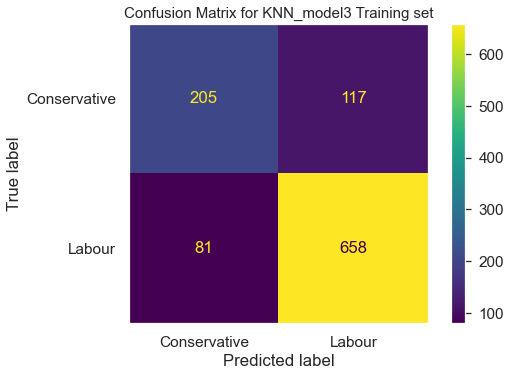

In [389]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for KNN_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       138
           1       0.86      0.90      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.83      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

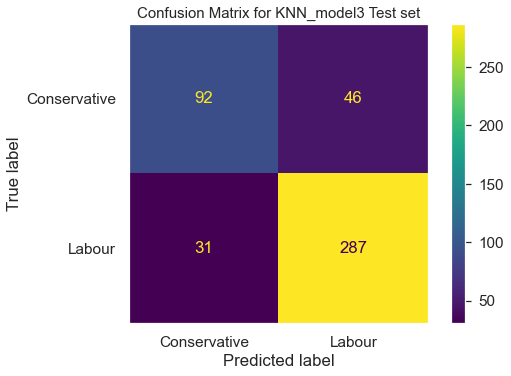

In [390]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(KNN_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for KNN_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

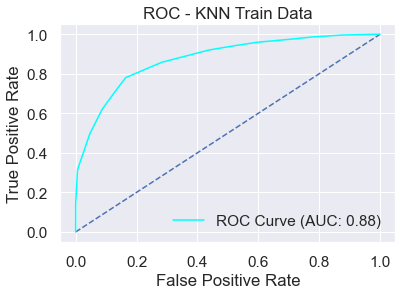

KNN_train_auc 0.8760852755528286


In [391]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

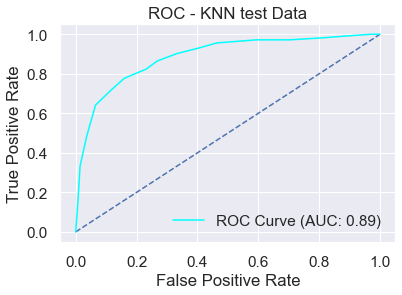

KNN_test_auc 0.8862455564670495


In [392]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

AUC for Training data = 0.8760852755528286
AUC for Test data = 0.8862455564670495


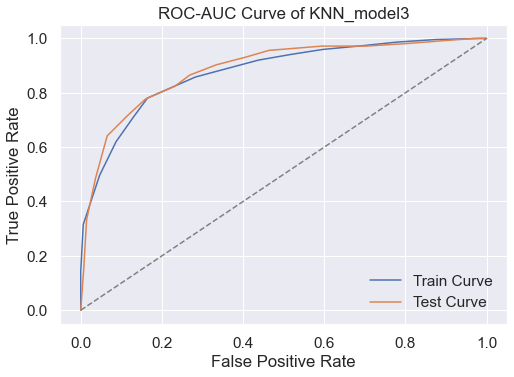

In [393]:
LR_train_predict_prob = KNN_model3.predict_proba(X_train)
LR_test_predict_prob = KNN_model3.predict_proba(X_test)
LR_pred_train_prob = KNN_model3.predict_proba(X_train)
LR_pred_test_prob = KNN_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(KNN_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(KNN_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of KNN_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Support Vector Machine with GridsearchCV

In [394]:
class_weight = dict({0:2.3, 1:1})
clf = svm.SVC(probability=True, class_weight = class_weight)
grid_values = {'C': np.logspace(-1,1,20),  
              'kernel': ['linear']#['linear', 'poly', 'rbf', 'sigmoid']
              } 
SVM_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
SVM_model3.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 2.3, 1: 1}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear']})

In [395]:
print("Best Parameters from SVM Model",SVM_model3.best_params_)

Best Parameters from SVM Model {'C': 0.6951927961775606, 'kernel': 'linear'}


In [396]:
ytrain_predict = SVM_model3.predict(X_train)
ytest_predict = SVM_model3.predict(X_test)

In [397]:
SVM_train_met3,SVM_train_accu3,SVM_train_precision3,SVM_train_recall3,SVM_train_f13 = performance_matrices(SVM_model3, X_train, y_train, ytrain_predict)
SVM_train_met_maj3,SVM_train_accu_maj3,SVM_train_precision_maj3,SVM_train_recall_maj3,SVM_train_f1_maj3 = performance_matrices_maj(SVM_model3, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu3)
print ('SVM_train_precision ',SVM_train_precision3)
print ('SVM_train_recall ',SVM_train_recall3)
print ('SVM_train_f1 ',SVM_train_f13)

SVM_train_accu  0.82
SVM_train_precision  0.65
SVM_train_recall  0.84
SVM_train_f1  0.73


In [398]:
SVM_train_met3

precision    recall  f1-score      support
0              0.654501  0.835404  0.733970   322.000000
1              0.918462  0.807848  0.859611   739.000000
accuracy       0.816211  0.816211  0.816211     0.816211
macro avg      0.786481  0.821626  0.796791  1061.000000
weighted avg   0.838353  0.816211  0.821481  1061.000000

In [399]:
SVM_test_met3,SVM_test_accu3,SVM_test_precision3,SVM_test_recall3,SVM_test_f13 = performance_matrices(SVM_model3, X_test, y_test, ytest_predict)
SVM_test_met_maj3,SVM_test_accu_maj3,SVM_test_precision_maj3,SVM_test_recall_maj3,SVM_test_f1_maj3 = performance_matrices_maj(SVM_model3, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu3)
print ('SVM_test_precision ',SVM_test_precision3)
print ('SVM_test_recall ',SVM_test_recall3)
print ('SVM_test_f1 ',SVM_test_f13)

SVM_test_accu  0.82
SVM_test_precision  0.65
SVM_test_recall  0.86
SVM_test_f1  0.74


In [400]:
SVM_test_met3

precision    recall  f1-score     support
0              0.650273  0.862319  0.741433  138.000000
1              0.930403  0.798742  0.859560  318.000000
accuracy       0.817982  0.817982  0.817982    0.817982
macro avg      0.790338  0.830530  0.800497  456.000000
weighted avg   0.845627  0.817982  0.823811  456.000000

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       322
           1       0.92      0.81      0.86       739

    accuracy                           0.82      1061
   macro avg       0.79      0.82      0.80      1061
weighted avg       0.84      0.82      0.82      1061
 



<Figure size 720x432 with 0 Axes>

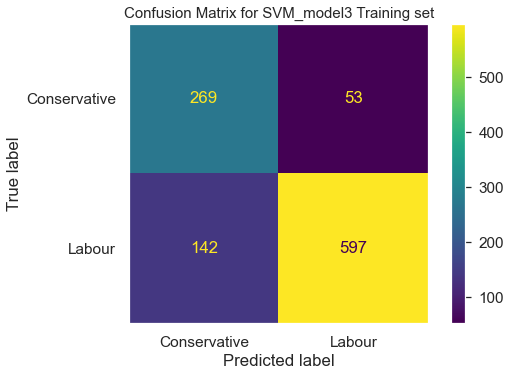

In [401]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for SVM_model3 Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.65      0.86      0.74       138
           1       0.93      0.80      0.86       318

    accuracy                           0.82       456
   macro avg       0.79      0.83      0.80       456
weighted avg       0.85      0.82      0.82       456
 



<Figure size 720x432 with 0 Axes>

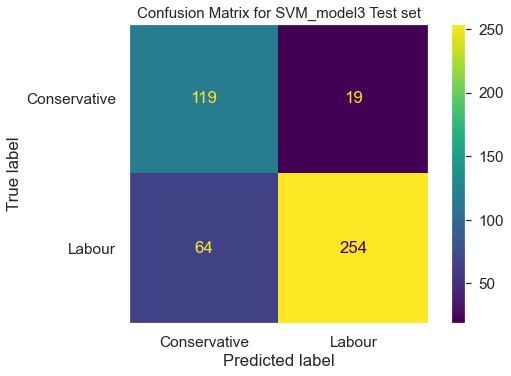

In [402]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(SVM_model3,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for SVM_model3 Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

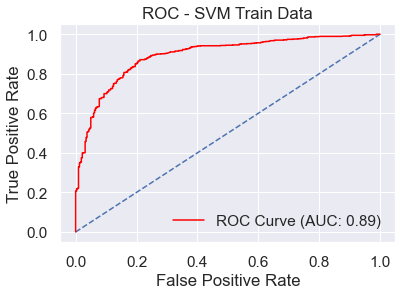

SVM_train_auc 0.8930168349036384


In [403]:
SVM_train_auc3, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model3, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc3)

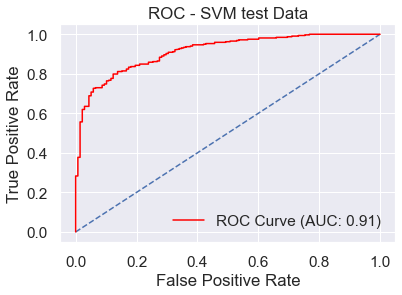

SVM_test_auc 0.9135447999270805


In [404]:
SVM_test_auc3, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model3, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc3)

AUC for Training data = 0.8930168349036384
AUC for Test data = 0.9135447999270805


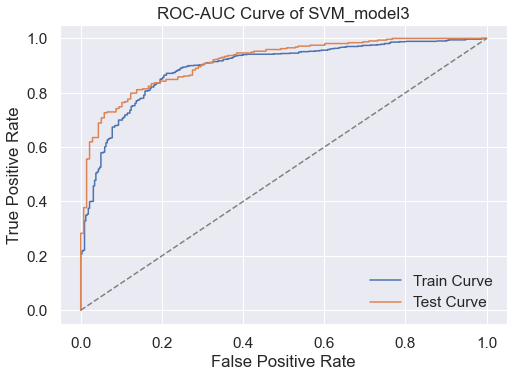

In [405]:
LR_train_predict_prob = SVM_model3.predict_proba(X_train)
LR_test_predict_prob = SVM_model3.predict_proba(X_test)
LR_pred_train_prob = SVM_model3.predict_proba(X_train)
LR_pred_test_prob = SVM_model3.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(SVM_model3, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(SVM_model3, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of SVM_model3');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### Bagging using RandomForest

In [406]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [407]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [408]:
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.88
Bagging_train_precision  0.76
Bagging_train_recall  0.87
Bagging_train_f1  0.81


In [409]:
Bagging_met

precision    recall  f1-score      support
0              0.760870  0.869565  0.811594   322.000000
1              0.939394  0.880920  0.909218   739.000000
accuracy       0.877474  0.877474  0.877474     0.877474
macro avg      0.850132  0.875243  0.860406  1061.000000
weighted avg   0.885214  0.877474  0.879590  1061.000000

In [410]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.83
Bagging_test_precision  0.69
Bagging_test_recall  0.78
Bagging_test_f1  0.73


In [411]:
Bagging_met

precision    recall  f1-score     support
0              0.694805  0.775362  0.732877  138.000000
1              0.897351  0.852201  0.874194  318.000000
accuracy       0.828947  0.828947  0.828947    0.828947
macro avg      0.796078  0.813782  0.803535  456.000000
weighted avg   0.836054  0.828947  0.831427  456.000000

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       322
           1       0.94      0.88      0.91       739

    accuracy                           0.88      1061
   macro avg       0.85      0.88      0.86      1061
weighted avg       0.89      0.88      0.88      1061
 



<Figure size 720x432 with 0 Axes>

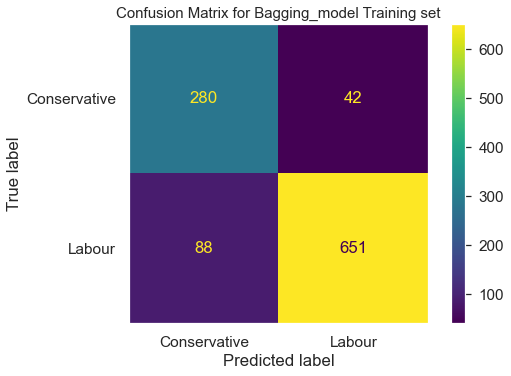

In [412]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for Bagging_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.69      0.78      0.73       138
           1       0.90      0.85      0.87       318

    accuracy                           0.83       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.84      0.83      0.83       456
 



<Figure size 720x432 with 0 Axes>

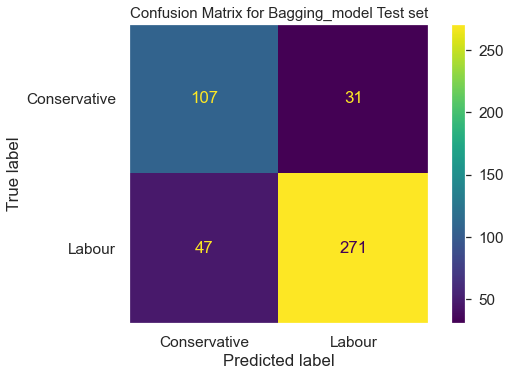

In [413]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(Bagging_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for Bagging_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

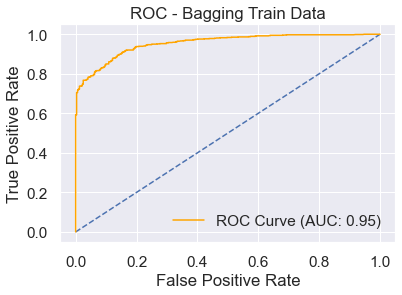

Bagging_train_auc 0.9543722001361586


In [414]:
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

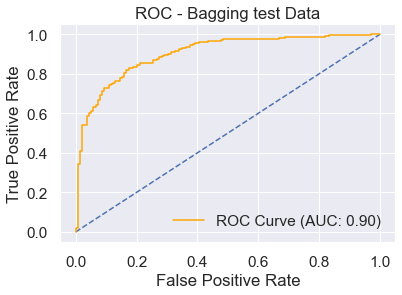

Bagging_test_auc 0.9024473612250479


In [415]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

AUC for Training data = 0.9543722001361586
AUC for Test data = 0.9024473612250479


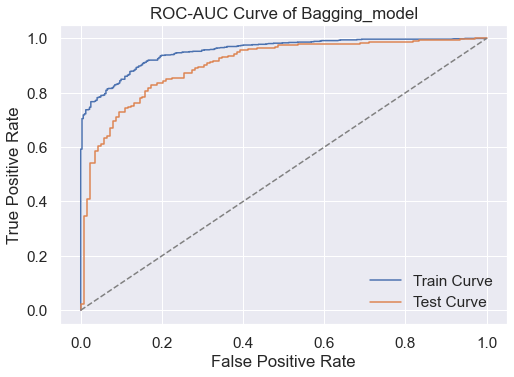

In [416]:
LR_train_predict_prob = Bagging_model.predict_proba(X_train)
LR_test_predict_prob = Bagging_model.predict_proba(X_test)
LR_pred_train_prob = Bagging_model.predict_proba(X_train)
LR_pred_test_prob = Bagging_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of Bagging_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

### XGBoost

In [417]:
!pip install xgboost

In [418]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [419]:
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [420]:
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.88
XGB_train_precision  0.83
XGB_train_recall  0.77
XGB_train_f1  0.8


In [421]:
XGB_met

precision    recall  f1-score      support
0              0.832776  0.773292  0.801932   322.000000
1              0.904199  0.932341  0.918055   739.000000
accuracy       0.884072  0.884072  0.884072     0.884072
macro avg      0.868488  0.852816  0.859993  1061.000000
weighted avg   0.882523  0.884072  0.882813  1061.000000

In [422]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.84
XGB_test_precision  0.76
XGB_test_recall  0.67
XGB_test_f1  0.71


In [423]:
XGB_met

precision    recall  f1-score     support
0              0.756098  0.673913  0.712644  138.000000
1              0.864865  0.905660  0.884793  318.000000
accuracy       0.835526  0.835526  0.835526    0.835526
macro avg      0.810481  0.789787  0.798718  456.000000
weighted avg   0.831948  0.835526  0.832695  456.000000

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       322
           1       0.90      0.93      0.92       739

    accuracy                           0.88      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.88      0.88      0.88      1061
 



<Figure size 720x432 with 0 Axes>

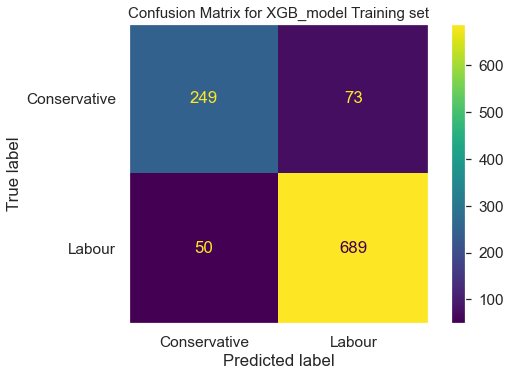

In [424]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_train,y_train,display_labels=['Conservative','Labour']);
plt.title("Confusion Matrix for XGB_model Training set",fontsize=15)
print(classification_report(y_train, ytrain_predict),'\n')
plt.grid(None)
plt.show();

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       138
           1       0.86      0.91      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456
 



<Figure size 720x432 with 0 Axes>

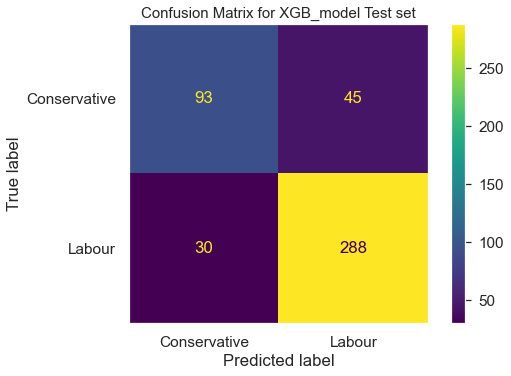

In [425]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
plot_confusion_matrix(XGB_model,X_test,y_test,display_labels=['Conservative','Labour'])
plt.title("Confusion Matrix for XGB_model Test set",fontsize=15)
print(classification_report(y_test, ytest_predict),'\n');
plt.grid(None)
plt.show();

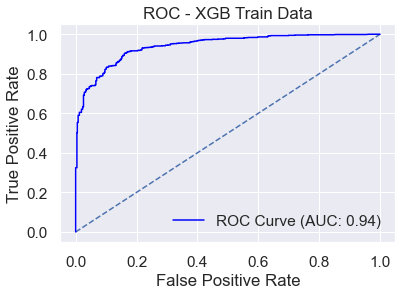

XGB_train_auc 0.9410762450079744


In [426]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

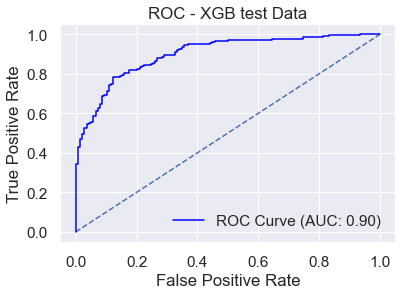

XGB_test_auc 0.899735666757816


In [427]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

AUC for Training data = 0.9426768589414939
AUC for Test data = 0.899735666757816


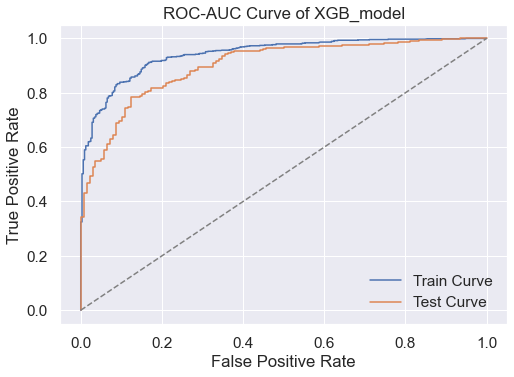

In [428]:
LR_train_predict_prob = XGB_model.predict_proba(X_train)
LR_test_predict_prob = XGB_model.predict_proba(X_test)
LR_pred_train_prob = XGB_model.predict_proba(X_train)
LR_pred_test_prob = XGB_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print("AUC for Training data =" ,LR_auc_train)
print("AUC for Test data =",LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(XGB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve');
plot_roc_curve(XGB_model, X_test, y_test, ax=ax,
              label = 'Test Curve');
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve of XGB_model');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1.4);

<AxesSubplot:xlabel='Feature', ylabel='Importance'>

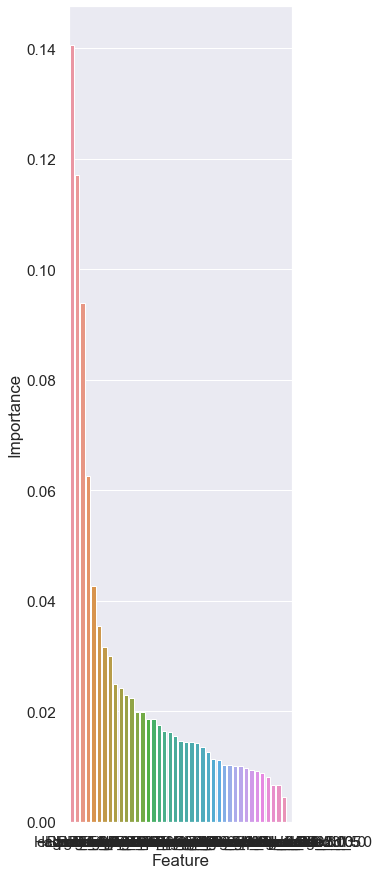

In [429]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : XGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,15))
sns.barplot(x='Feature', y='Importance', data=feature_rank)

### Gradient Boosting Classifier

In [430]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [431]:
ytrain_predict = GBC_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [432]:
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  0.99
GBC_train_precision  0.98
GBC_train_recall  0.98
GBC_train_f1  0.98


In [433]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.81
GBC_test_precision  0.7
GBC_test_recall  0.65
GBC_test_f1  0.67


### Cross Validation of all final models

### Logistic Regression

In [434]:
from sklearn.model_selection import cross_val_score

In [435]:
scores = cross_val_score(logit_model3, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.8411215 , 0.83018868, 0.82075472, 0.81132075, 0.82075472,
       0.77358491, 0.80188679, 0.79245283, 0.81132075, 0.83018868])

In [436]:
logit_train_CVmean = scores.mean()
logit_train_CVstd = scores.std()
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.81 (+/- 0.02)


In [437]:
scores = cross_val_score(logit_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.82608696, 0.84782609, 0.86956522, 0.80434783, 0.82608696,
       0.7826087 , 0.71111111, 0.91111111, 0.88888889, 0.86666667])

In [438]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.83 (+/- 0.05)


### LDA

In [439]:
scores = cross_val_score(model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.5       , 0.5       , 0.5       , 0.5       , 0.77702703,
       0.89189189, 0.94594595, 0.93243243, 0.95238095, 0.92517007])

In [440]:
LDA_train_CVmean = scores.mean()
LDA_train_CVstd = scores.std()
print("LDA Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Train Accuracy: 0.74 (+/- 0.20)


In [441]:
scores = cross_val_score(model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.84782609, 0.86956522, 0.84782609, 0.7826087 , 0.82608696,
       0.7173913 , 0.71111111, 0.91111111, 0.86666667, 0.86666667])

In [442]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.82 (+/- 0.06)


### KNN

In [443]:
scores = cross_val_score(KNN_model3, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.81756757, 0.83108108, 0.72297297, 0.81756757, 0.85135135,
       0.86486486, 0.89189189, 0.84459459, 0.89115646, 0.83673469])

In [444]:
KNN_train_CVmean = scores.mean()
KNN_train_CVstd = scores.std()
print("KNN Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Train Accuracy: 0.84 (+/- 0.05)


In [445]:
scores = cross_val_score(KNN_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.82608696, 0.82608696, 0.82608696, 0.7826087 , 0.82608696,
       0.7826087 , 0.68888889, 0.84444444, 0.8       , 0.77777778])

In [446]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.80 (+/- 0.04)


### MNB

In [447]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.85046729, 0.85849057, 0.83018868, 0.78301887, 0.86792453,
       0.79245283, 0.79245283, 0.78301887, 0.83018868, 0.80188679])

In [448]:
MNB_train_CVmean = scores.mean()
MNB_train_CVstd = scores.std()
print("MNB Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Train Accuracy: 0.82 (+/- 0.03)


In [449]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.86956522, 0.89130435, 0.86956522, 0.7826087 , 0.84782609,
       0.7173913 , 0.82222222, 0.88888889, 0.88888889, 0.86666667])

In [450]:
MNB_test_CVmean = scores.mean()
MNB_test_CVstd = scores.std()
print("MNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Test Accuracy: 0.84 (+/- 0.05)


###  SVM

In [451]:
scores = cross_val_score(SVM_model3, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.85981308, 0.83962264, 0.80188679, 0.81132075, 0.83962264,
       0.76415094, 0.75471698, 0.76415094, 0.82075472, 0.80188679])

In [452]:
SVM_train_CVmean = scores.mean()
SVM_train_CVstd = scores.std()
print("SVM Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Train Accuracy: 0.81 (+/- 0.03)


In [453]:
scores = cross_val_score(SVM_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.7826087 , 0.82608696, 0.82608696, 0.76086957, 0.7826087 ,
       0.69565217, 0.71111111, 0.82222222, 0.88888889, 0.8       ])

In [454]:
SVM_test_CVmean = scores.mean()
SVM_test_CVstd = scores.std()
print("SVM Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Test Accuracy: 0.79 (+/- 0.05)


### Bagging with RF

In [455]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.83783784, 0.88513514, 0.81081081, 0.83108108, 0.87162162,
       0.87837838, 0.83108108, 0.84459459, 0.8707483 , 0.86394558])

In [456]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVstd = scores.std()
print("Bagging Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Train Accuracy: 0.85 (+/- 0.02)


In [457]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.86956522, 0.89130435, 0.84782609, 0.84782609, 0.84782609,
       0.73913043, 0.66666667, 0.86666667, 0.88888889, 0.82222222])

In [458]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVstd = scores.std() 
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.83 (+/- 0.07)


### XGBoost

In [459]:
scores = cross_val_score(XGB_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.81756757, 0.82432432, 0.83783784, 0.83108108, 0.89189189,
       0.89864865, 0.86486486, 0.87837838, 0.91156463, 0.89115646])

In [460]:
XGB_train_CVmean = scores.mean()
XGB_train_CVstd = scores.std() 
print("XGBoost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

XGBoost Train Accuracy: 0.86 (+/- 0.03)


In [461]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.84782609, 0.89130435, 0.82608696, 0.7826087 , 0.7826087 ,
       0.7826087 , 0.73333333, 0.88888889, 0.91111111, 0.84444444])

In [462]:
XGB_test_CVmean = scores.mean()
XGB_test_CVstd = scores.std() 
print("XGBoost Test Accuracy: %0.2f (+/- %0.2f)" % (XGB_test_CVmean, XGB_test_CVstd))

XGBoost Test Accuracy: 0.83 (+/- 0.06)


### Ada Boost

In [463]:
from sklearn.ensemble import AdaBoostClassifier

In [464]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [465]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8407163053722903
[[225  97]
 [ 72 667]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       322
           1       0.87      0.90      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.892


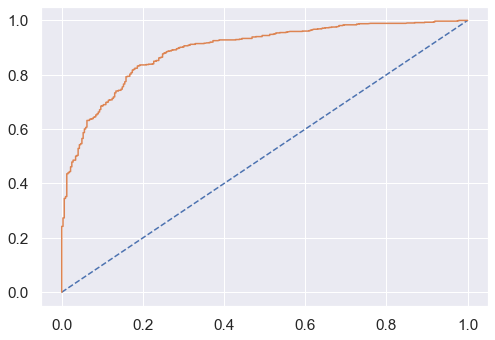

In [466]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### Gradient Boosting

In [467]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [468]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8755890669180019
[[242  80]
 [ 52 687]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       322
           1       0.90      0.93      0.91       739

    accuracy                           0.88      1061
   macro avg       0.86      0.84      0.85      1061
weighted avg       0.87      0.88      0.87      1061



### AUC _ROC Curve Boosting Train

AUC: 0.943


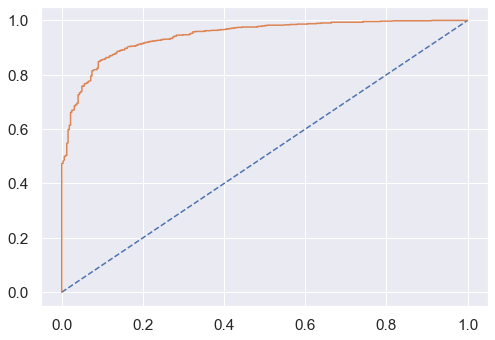

In [469]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### ADA Boosting Test

In [470]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8377192982456141
[[ 94  44]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.84       456



### AUC _ROC Curve Boosting Test

AUC: 0.911


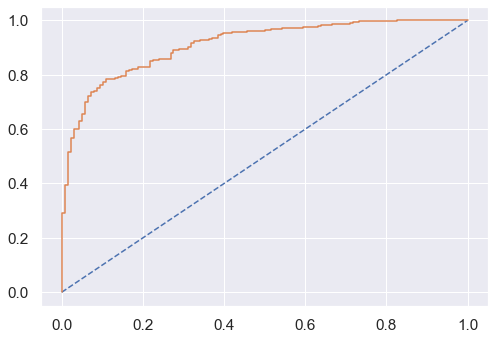

In [471]:
probs_test = ADB_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Gradient Boosting Test

In [472]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8442982456140351
[[ 91  47]
 [ 24 294]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       138
           1       0.86      0.92      0.89       318

    accuracy                           0.84       456
   macro avg       0.83      0.79      0.81       456
weighted avg       0.84      0.84      0.84       456



### Gradient Boosting AUC_ROC Curve Test

AUC: 0.901


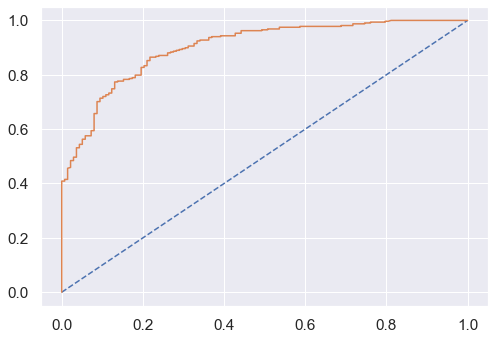

In [473]:
probs_test = gbc_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.


In [474]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc1,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc1,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'SVM Train':[SVM_train_accu3,SVM_train_auc3,SVM_train_recall3,SVM_train_recall_maj3,SVM_train_precision3,SVM_train_precision_maj3,SVM_train_f13,SVM_train_f1_maj3],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     },index=index)
round(train_perf_data,2)

Logit Train  LDA Train  KNN Train  MNB Train  SVM Train  \
Accuracy            0.83       0.84       0.81       0.83       0.82   
AUC                 0.89       0.89       0.88       0.88       0.89   
Recall-0            0.82       0.72       0.64       0.71       0.84   
Recall-1            0.83       0.89       0.89       0.88       0.81   
Precision-0         0.68       0.75       0.72       0.72       0.65   
Precision-1         0.92       0.88       0.85       0.87       0.92   
F1 Score-0          0.74       0.73       0.67       0.71       0.73   
F1 Score-1          0.87       0.89       0.87       0.88       0.86   

             Bagging Train  XGB Train  
Accuracy              0.88       0.88  
AUC                   0.95       0.94  
Recall-0              0.87       0.77  
Recall-1              0.88       0.93  
Precision-0           0.76       0.83  
Precision-1           0.94       0.90  
F1 Score-0            0.81       0.80  
F1 Score-1            0.91       0.92

In [475]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc1,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc1,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj],
                     'SVM Test':[SVM_test_accu3,SVM_test_auc3,SVM_test_recall3,SVM_test_recall_maj3,SVM_test_precision3,SVM_test_precision_maj3,SVM_test_f13,SVM_test_f1_maj3],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj]
                    },index=index)
round(test_perf_data,2)

Logit Test  LDA Test  KNN Test  MNB Test  SVM Test  Bagging Test  \
Accuracy           0.82      0.85      0.83      0.84      0.82          0.83   
AUC                0.92      0.92      0.89      0.92      0.91          0.90   
Recall-0           0.82      0.72      0.67      0.72      0.86          0.78   
Recall-1           0.83      0.91      0.90      0.89      0.80          0.85   
Precision-0        0.67      0.77      0.75      0.74      0.65          0.69   
Precision-1        0.91      0.88      0.86      0.88      0.93          0.90   
F1 Score-0         0.74      0.74      0.70      0.73      0.74          0.73   
F1 Score-1         0.87      0.89      0.88      0.89      0.86          0.87   

             XGB Test  
Accuracy         0.84  
AUC              0.90  
Recall-0         0.67  
Recall-1         0.91  
Precision-0      0.76  
Precision-1      0.86  
F1 Score-0       0.71  
F1 Score-1       0.88

In [476]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVstd],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVstd],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVstd],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVstd],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVstd],
                     'SVM Train':[SVM_train_CVmean,SVM_train_CVstd],
                     'SVM Test':[SVM_test_CVmean,SVM_test_CVstd],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVstd],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVstd],
                     'XGB Train':[XGB_train_CVmean,XGB_train_CVstd],
                     'XGB Test':[XGB_test_CVmean,XGB_test_CVstd]
                    },index=index)
round(CV_data,2)

Logit Train  Logit Test  LDA Train  LDA Test  KNN Train  \
CV Mean Accuracy         0.81        0.83       0.74      0.82       0.84   
CV Std Deviation         0.02        0.05       0.20      0.06       0.05   

                  KNN Test  MNB Train  MNB Test  SVM Train  SVM Test  \
CV Mean Accuracy      0.80       0.82      0.84       0.81      0.79   
CV Std Deviation      0.04       0.03      0.05       0.03      0.05   

                  Bagging Train  Bagging Test  XGB Train  XGB Test  
CV Mean Accuracy           0.85          0.83       0.86      0.83  
CV Std Deviation           0.02          0.07       0.03      0.06

In [477]:
from matplotlib.patches import Rectangle

Text(0.5, 1.0, 'Models Performances on Train Datasets')

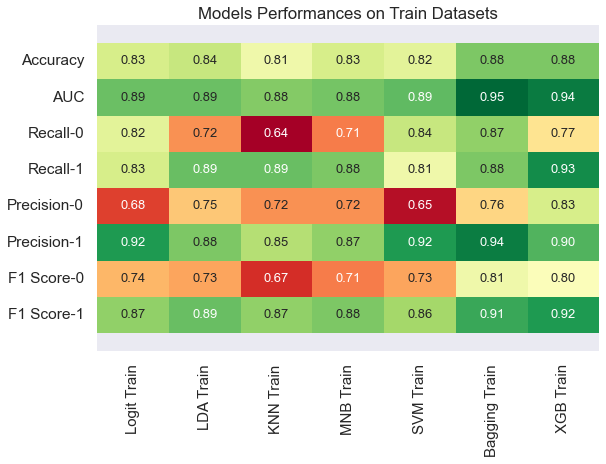

In [478]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(train_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Models Performances on Train Datasets')

Text(0.5, 1.0, 'Model Performance in Test Datasets')

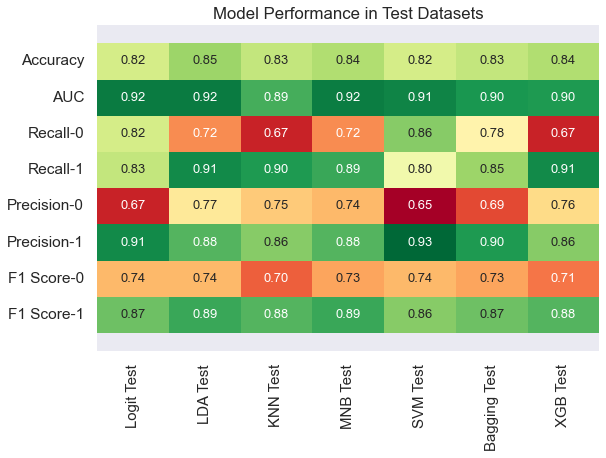

In [479]:
plt.subplots(figsize=(9,6))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=15)
plt.title('Model Performance in Test Datasets')

Text(0.5, 1.0, 'Cross Validation Scores - Train & Test')

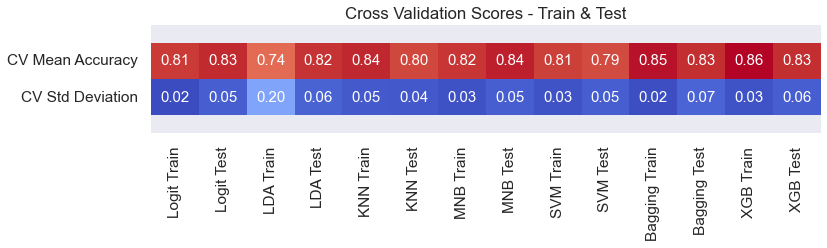

In [480]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='coolwarm', annot=True, fmt='.2f',annot_kws={"fontsize":15}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores - Train & Test')

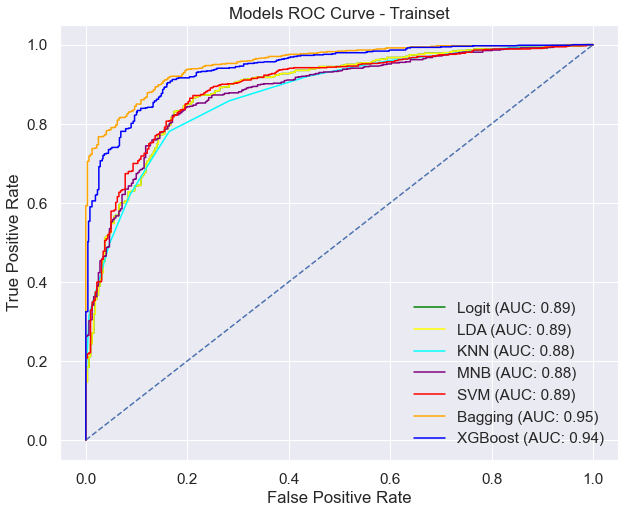

In [481]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc1)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(MNB_train_fpr,MNB_train_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_train_auc1)
plt.plot(SVM_train_fpr,SVM_train_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_train_auc3)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Trainset')
plt.legend(loc="lower right")

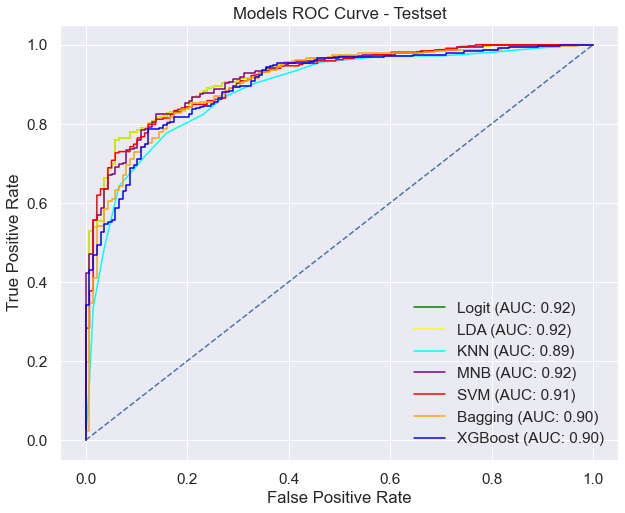

In [482]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc1)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(MNB_test_fpr,MNB_test_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_test_auc1)
plt.plot(SVM_test_fpr,SVM_test_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_test_auc3)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Models ROC Curve - Testset')
plt.legend(loc="lower right");


# 1.8 Based on these predictions, what are the insights?

# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

In [483]:
import nltk
import random
import string

#pip install gensim
from gensim.models import Word2Vec
from nltk.stem.snowball import SnowballStemmer
import json
import re
from nltk.corpus import inaugural
from sklearn.feature_extraction.text import TfidfVectorizer

In [484]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Aishwarya\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [485]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [486]:
len(inaugural.fileids())

59

In [487]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [488]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [489]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [490]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [491]:
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  
1941-Roosevelt  On each national day of inauguration since 178...  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...

# 2.1 Find the number of characters, words, and sentences for the mentioned documents

In [492]:
inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [493]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [494]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

### Number of Words

In [495]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  
1941-Roosevelt  On each national day of inauguration since 178...        1323  
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364  
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769

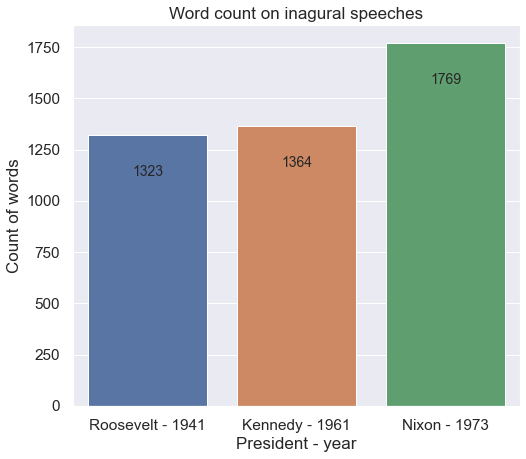

In [496]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech)
plt.title('Word count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of words',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

### Number of characters

In [497]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len()
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  
1941-Roosevelt        7571  
1961-Kennedy          7618  
1973-Nixon            9991

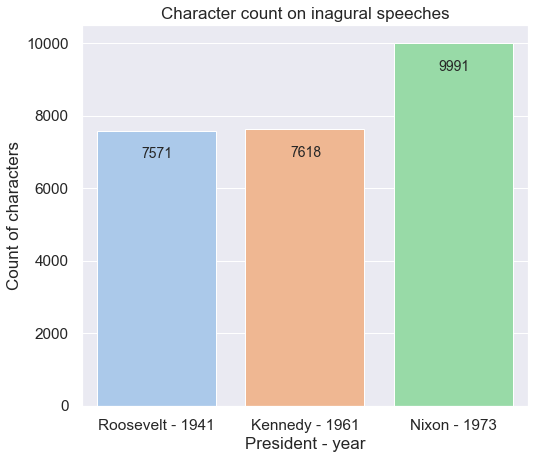

In [498]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'pastel')
plt.title('Character count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of characters',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)


### Number of sentences

In [499]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  On each national day of inauguration since 178...        1323   
1961-Kennedy    Vice President Johnson, Mr. Speaker, Mr. Chief...        1364   
1973-Nixon      Mr. Vice President, Mr. Speaker, Mr. Chief Jus...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

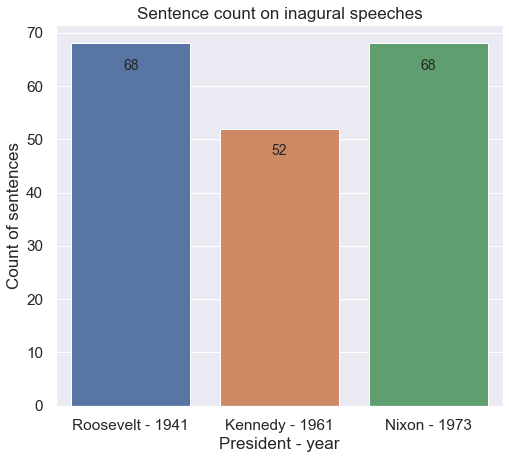

In [500]:
plt.figure(figsize=(8,7))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech)
plt.title('Sentence count on inagural speeches',fontsize=17)
plt.xlabel('President - year',fontsize=17)
plt.ylabel('Count of sentences',fontsize=17)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

# 2.2 Remove all the stopwords from all three speeches.

In [501]:
# Lower case conversion
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [502]:
# Remove punctuation
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [503]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall']
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

In [504]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

president  \
1941-Roosevelt  Roosevelt - 1941   
1961-Kennedy      Kennedy - 1961   
1973-Nixon          Nixon - 1973   

                                                             text  word_count  \
1941-Roosevelt  national day inauguration since 1789 people re...        1323   
1961-Kennedy    vice president johnson speaker chief justice p...        1364   
1973-Nixon      vice president speaker chief justice senator c...        1769   

                char_count  sents_count  
1941-Roosevelt        7571           68  
1961-Kennedy          7618           52  
1973-Nixon            9991           68

In [505]:
print("Speech of president Roosevelt without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Roosevelt - 1941"].text)

Speech of president Roosevelt without stopwords


['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [506]:
print("Speech of president Kennedy without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Kennedy - 1961"].text)

Speech of president Kennedy without stopwords


['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [507]:
print("Speech of president Nixon without stopwords")
list(inaugural_speech[inaugural_speech['president']=="Nixon - 1973"].text)

Speech of president Nixon without stopwords


['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [508]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:5]
freq

nation       11
know         10
spirit        9
democracy     9
life          8
dtype: int64

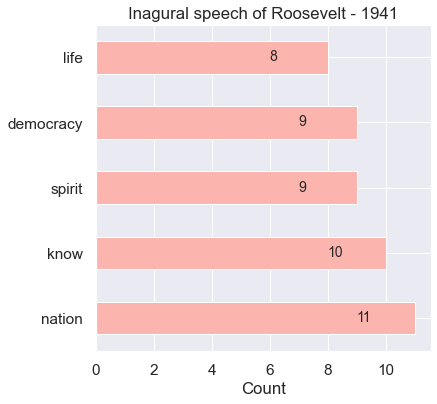

In [509]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Pastel1')
plt.title('Inagural speech of Roosevelt - 1941')
plt.xlabel('Count')
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [510]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:5]
freq

world     8
sides     8
new       7
pledge    7
power     5
dtype: int64

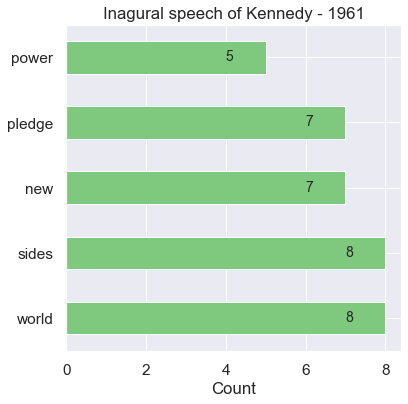

In [511]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'Accent')
plt.title('Inagural speech of Kennedy - 1961')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [512]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:5]
freq

peace             19
world             16
new               15
america           13
responsibility    11
dtype: int64

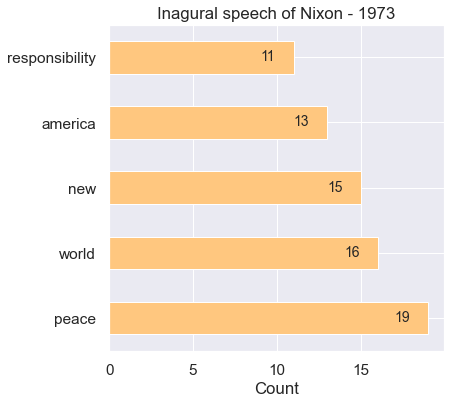

In [513]:
plt.figure(figsize=(6,6))
ax = freq.plot(kind='barh', colormap = 'copper_r')
plt.title('Inagural speech of Nixon - 1973')
plt.xlabel('Count')
#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) 

Word Cloud for Roosevelt after cleaning


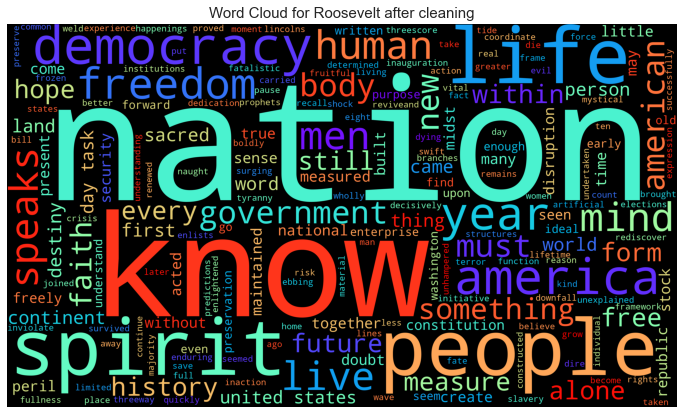

In [514]:
from wordcloud import WordCloud,STOPWORDS
#new_df=inaugural_speech.iloc[0:1,0]
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Roosevelt after cleaning",fontsize=15)
print("Word Cloud for Roosevelt after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Kennedy after cleaning


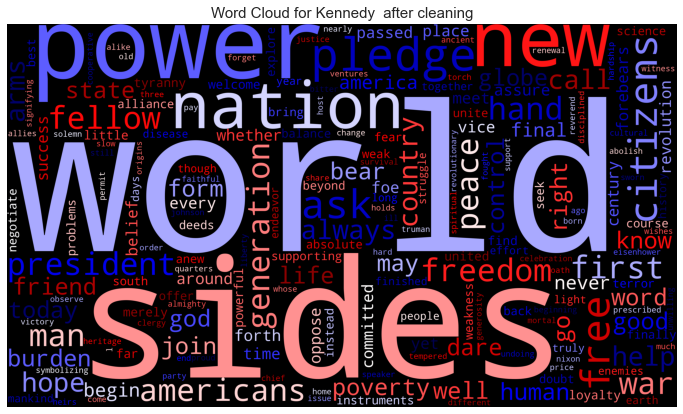

In [515]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'seismic_r',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Kennedy  after cleaning",fontsize=15)
print("Word Cloud for Kennedy after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Word Cloud for Nixon after cleaning


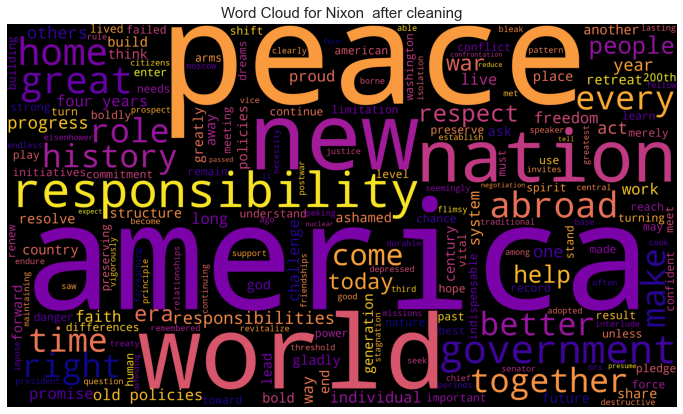

In [523]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'plasma',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.title("Word Cloud for Nixon  after cleaning",fontsize=15)
print("Word Cloud for Nixon after cleaning")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()